In [ ]:
## Data Exploration and Preprocessing

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [ ]:
# BASIC DATA CLEANING

In [ ]:
#creating a df from pandas
data = {
    'Date': ['2024-01-01 ', ' 2024-01-02', '2024-01-03'],
    'Price': ['$1,200', '$950', 'N/A'],
    'Category': [' SUV', 'Sedan ', 'Truck'],
    'Purchased': ['Yes', 'No', 'Yes'],
    'Mileage (km)': ['10,000', '8500', '12,200'],
    'Flag': [True, False, True]
}
df = pd.DataFrame(data)
df

In [2]:
# STRING CLEANING
df['Date'] = df['Date'].str.strip()
df['Category'] = df['Category'].str.strip()
df['Price'] = df['Price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Mileage (km)'] = df['Mileage (km)'].str.replace(',', '', regex=False)
df

In [ ]:
# Convert to numeric 

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Mileage (km)'] = pd.to_numeric(df['Mileage (km)'], errors='coerce')
df


In [ ]:
# handle missing values nan

df_drop = df.dropna()
df['Price'] = df['Price'].fillna(df['Price'].mean())
df['Mileage (km)'] = df['Mileage (km)'].fillna(0)
df


In [ ]:
# drop columns

df = df.drop(columns=['Date'])
df


In [ ]:
# encode categorical variables

le = LabelEncoder()
df['Category_LE'] = le.fit_transform(df['Category'])

df_onehot = pd.get_dummies(df, columns=['Category'], drop_first=True)
df_onehot.head()

In [ ]:
# convert boolean to binary

df['Purchased'] = df['Purchased'].map({'Yes': 1, 'No': 0})
df['Flag'] = df['Flag'].astype(int)
df

In [ ]:
# feature scaling

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
cols_to_scale = ['Price', 'Mileage (km)']

df_standard = df.copy()
df_standard[cols_to_scale] = scaler_standard.fit_transform(df_standard[cols_to_scale])

df_minmax = df.copy()
df_minmax[cols_to_scale] = scaler_minmax.fit_transform(df_minmax[cols_to_scale])

print("Standard Scaled:")
display(df_standard.head())

print("Min-Max Scaled:")
display(df_minmax.head())


In [ ]:
# CHECKING OUR DATA

print("Data Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isna().sum())
df.head()


In [ ]:
# RENAMING COLUMNS
df = df.rename(columns={'Price ($)': 'Price', 'Mileage (km)': 'Mileage'})

In [ ]:
## ➕ Creating, Adding, and Deleting Variables & Observations
# This section covers how to create new columns (variables), modify them, and add or remove rows (observations) in a DataFrame.

# --- Creating New Variables (Columns) ---
# Simple column creation using arithmetic
df["Price_per_km"] = df["Price"] / df["Mileage (km)"]

# Create based on conditions
df["High_Price"] = np.where(df["Price"] > 1000, 1, 0)

# Create using existing columns (e.g., log transform)
df["Log_Price"] = np.log(df["Price"] + 1)

# Create from string operations
df["Category_Length"] = df["Category"].str.len()

# --- Adding Columns ---
# Add a constant column
df["Region"] = "Ontario"

# Add a new column using assign (returns new DataFrame)
df = df.assign(Discounted_Price=lambda x: x["Price"] * 0.9)

# --- Deleting Columns ---
# Drop one or multiple columns
df = df.drop(columns=["Region", "High_Price"])

# --- Adding Observations (Rows) ---
# Create a new row as a dictionary
new_row = {"Price": 800, "Mileage (km)": 9000, "Category": "SUV", "Purchased": 1, "Flag": 1, "Price_per_km": 0.088, "Log_Price": np.log(801), "Category_Length": 3}
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# --- Deleting Observations (Rows) ---
# Drop by index
df = df.drop(index=0)

# Drop rows based on condition
df = df[df["Price"] > 500]

# --- Renaming Columns (Quick Reference) ---
df = df.rename(columns={"Price": "Price_CAD", "Mileage (km)": "Mileage_km"})

# --- Final Preview ---
df.head()

In [3]:
# Pandas READ CSV
churn = pd.read_csv("churn.txt")

In [4]:
#SHAPE: rows and columns of dataset
churn.shape

(3333, 21)

In [5]:
# HEAD: DISPLAY FIRST X OBSERVATION
churn.head(10)

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   
5    AL             118        510  391-8027        yes         no   
6    MA             121        510  355-9993         no        yes   
7    MO             147        415  329-9001        yes         no   
8    LA             117        408  335-4719         no         no   
9    WV             141        415  330-8173        yes        yes   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   
5              0     223.4         98       37.98  ...        101       18.75   
6             24     218.2         88       37.09  ...        108       29.62   
7              0     157.0         79       26.69  ...         94        8.76   
8              0     184.5         97       31.37  ...         80       29.89   
9             37     258.6         84       43.96  ...        111       18.87   

   Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       254.4          103         11.45       13.7           3         3.70   
2       162.6          104          7.32       12.2           5         3.29   
3       196.9           89          8.86        6.6           7         1.78   
4       186.9          121          8.41       10.1           3         2.73   
5       203.9          118          9.18        6.3           6         1.70   
6       212.6          118          9.57        7.5           7         2.03   
7       211.8           96          9.53        7.1           6         1.92   
8       215.8           90          9.71        8.7           4         2.35   
9       326.4           97         14.69       11.2           5         3.02   

   CustServ Calls  Churn?  
0               1  False.  
1               1  False.  
2               0  False.  
3               2  False.  
4               3  False.  
5               0  False.  
6               3  False.  
7               0  False.  
8               1  False.  
9               0  False.  

[10 rows x 21 columns]

In [6]:
# DATA TYPES 
churn.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [7]:
# NONnull count and data types
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [8]:
#VIEW THE CHURN COLUMN
churn["Churn?"]

0       False.
1       False.
2       False.
3       False.
4       False.
         ...  
3328    False.
3329    False.
3330    False.
3331    False.
3332    False.
Name: Churn?, Length: 3333, dtype: object

In [9]:
# COUNT UNIQUE VALUES IN CHURN COLUMN
churn["Churn?"].value_counts()

Churn?
False.    2850
True.      483
Name: count, dtype: int64

In [10]:
# NORMALIZE COUNT VALUES IN CHRUN % 
churn["Churn?"].value_counts(normalize = True)* 100

Churn?
False.    85.508551
True.     14.491449
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Churning Customers')

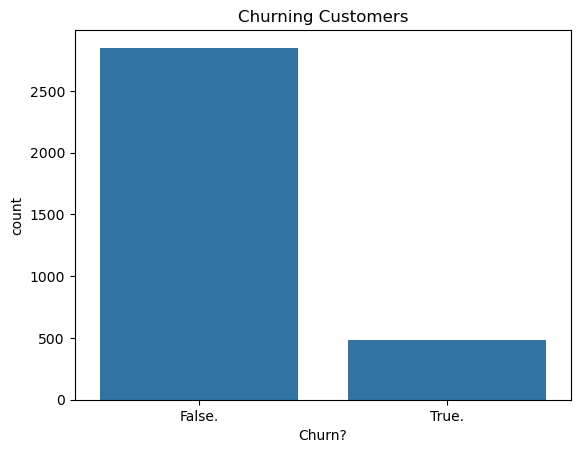

In [11]:
ax = sns.countplot(churn, x="Churn?")
ax.set_title("Churning Customers")

<Axes: title={'center': 'Churning Customers'}, xlabel='Churn?'>

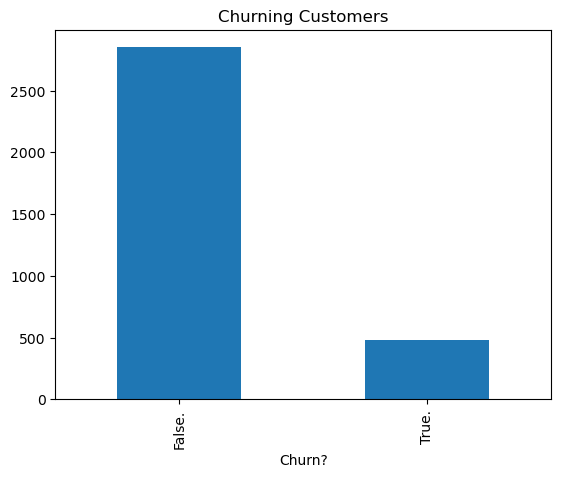

In [12]:
churn["Churn?"].value_counts().plot(kind= 'bar', title="Churning Customers")

In [13]:
churn_crosstab = pd.crosstab(churn["Churn?"], churn["Int'l Plan"], margins=False)
churn_crosstab

Int'l Plan    no  yes
Churn?               
False.      2664  186
True.        346  137

In [14]:
pd.crosstab(churn["Churn?"], churn["Int'l Plan"], margins=True)

Int'l Plan    no  yes   All
Churn?                     
False.      2664  186  2850
True.        346  137   483
All         3010  323  3333

<Axes: xlabel="Int'l Plan", ylabel='count'>

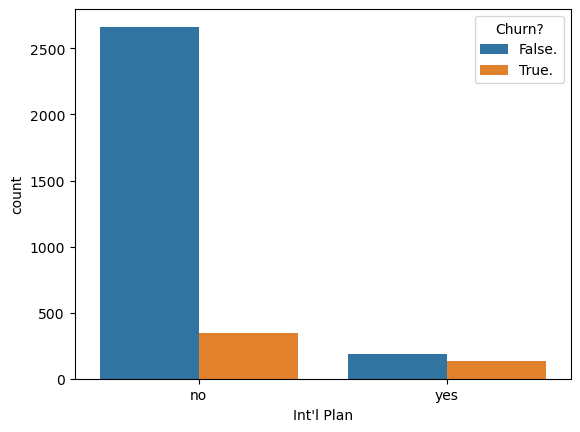

In [15]:
sns.countplot(x="Int'l Plan", hue="Churn?", data=churn)

In [16]:
churn_crosstab = churn_crosstab.transpose()
churn_crosstab

Churn?      False.  True.
Int'l Plan               
no            2664    346
yes            186    137

<Axes: xlabel="Int'l Plan">

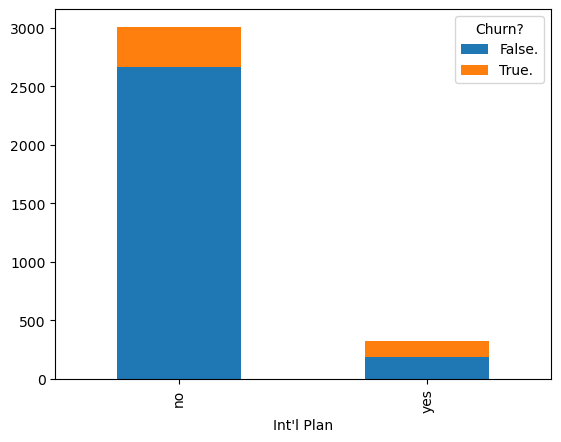

In [17]:
churn_crosstab.plot(kind = 'bar', stacked=True)

In [18]:
churn_crosstab_norm = churn_crosstab.div(churn_crosstab.sum(axis=1), axis=0)
churn_crosstab_norm

Churn?        False.     True.
Int'l Plan                    
no          0.885050  0.114950
yes         0.575851  0.424149

<Axes: xlabel="Int'l Plan">

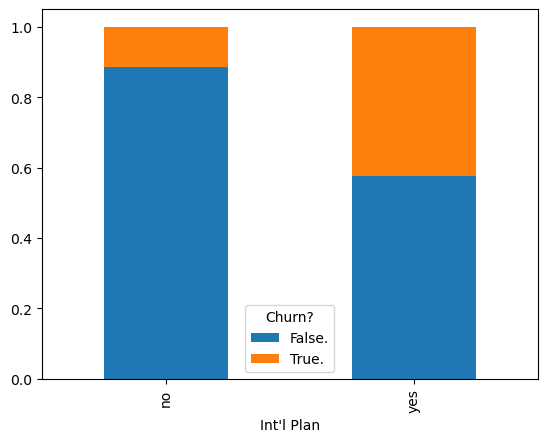

In [19]:
churn_crosstab_norm.plot(kind = 'bar', stacked=True)

In [20]:
churn.describe()

Account Length    Area Code  VMail Message     Day Mins    Day Calls  \
count     3333.000000  3333.000000    3333.000000  3333.000000  3333.000000   
mean       101.064806   437.182418       8.099010   179.775098   100.435644   
std         39.822106    42.371290      13.688365    54.467389    20.069084   
min          1.000000   408.000000       0.000000     0.000000     0.000000   
25%         74.000000   408.000000       0.000000   143.700000    87.000000   
50%        101.000000   415.000000       0.000000   179.400000   101.000000   
75%        127.000000   510.000000      20.000000   216.400000   114.000000   
max        243.000000   510.000000      51.000000   350.800000   165.000000   

        Day Charge     Eve Mins    Eve Calls   Eve Charge   Night Mins  \
count  3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean     30.562307   200.980348   100.114311    17.083540   200.872037   
std       9.259435    50.713844    19.922625     4.310668    50.573847   
min       0.000000     0.000000     0.000000     0.000000    23.200000   
25%      24.430000   166.600000    87.000000    14.160000   167.000000   
50%      30.500000   201.400000   100.000000    17.120000   201.200000   
75%      36.790000   235.300000   114.000000    20.000000   235.300000   
max      59.640000   363.700000   170.000000    30.910000   395.000000   

       Night Calls  Night Charge    Intl Mins   Intl Calls  Intl Charge  \
count  3333.000000   3333.000000  3333.000000  3333.000000  3333.000000   
mean    100.107711      9.039325    10.237294     4.479448     2.764581   
std      19.568609      2.275873     2.791840     2.461214     0.753773   
min      33.000000      1.040000     0.000000     0.000000     0.000000   
25%      87.000000      7.520000     8.500000     3.000000     2.300000   
50%     100.000000      9.050000    10.300000     4.000000     2.780000   
75%     113.000000     10.590000    12.100000     6.000000     3.270000   
max     175.000000     17.770000    20.000000    20.000000     5.400000   

       CustServ Calls  
count     3333.000000  
mean         1.562856  
std          1.315491  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          2.000000  
max          9.000000

array([[<Axes: title={'center': 'Account Length'}>,
        <Axes: title={'center': 'Area Code'}>,
        <Axes: title={'center': 'VMail Message'}>,
        <Axes: title={'center': 'Day Mins'}>],
       [<Axes: title={'center': 'Day Calls'}>,
        <Axes: title={'center': 'Day Charge'}>,
        <Axes: title={'center': 'Eve Mins'}>,
        <Axes: title={'center': 'Eve Calls'}>],
       [<Axes: title={'center': 'Eve Charge'}>,
        <Axes: title={'center': 'Night Mins'}>,
        <Axes: title={'center': 'Night Calls'}>,
        <Axes: title={'center': 'Night Charge'}>],
       [<Axes: title={'center': 'Intl Mins'}>,
        <Axes: title={'center': 'Intl Calls'}>,
        <Axes: title={'center': 'Intl Charge'}>,
        <Axes: title={'center': 'CustServ Calls'}>]], dtype=object)

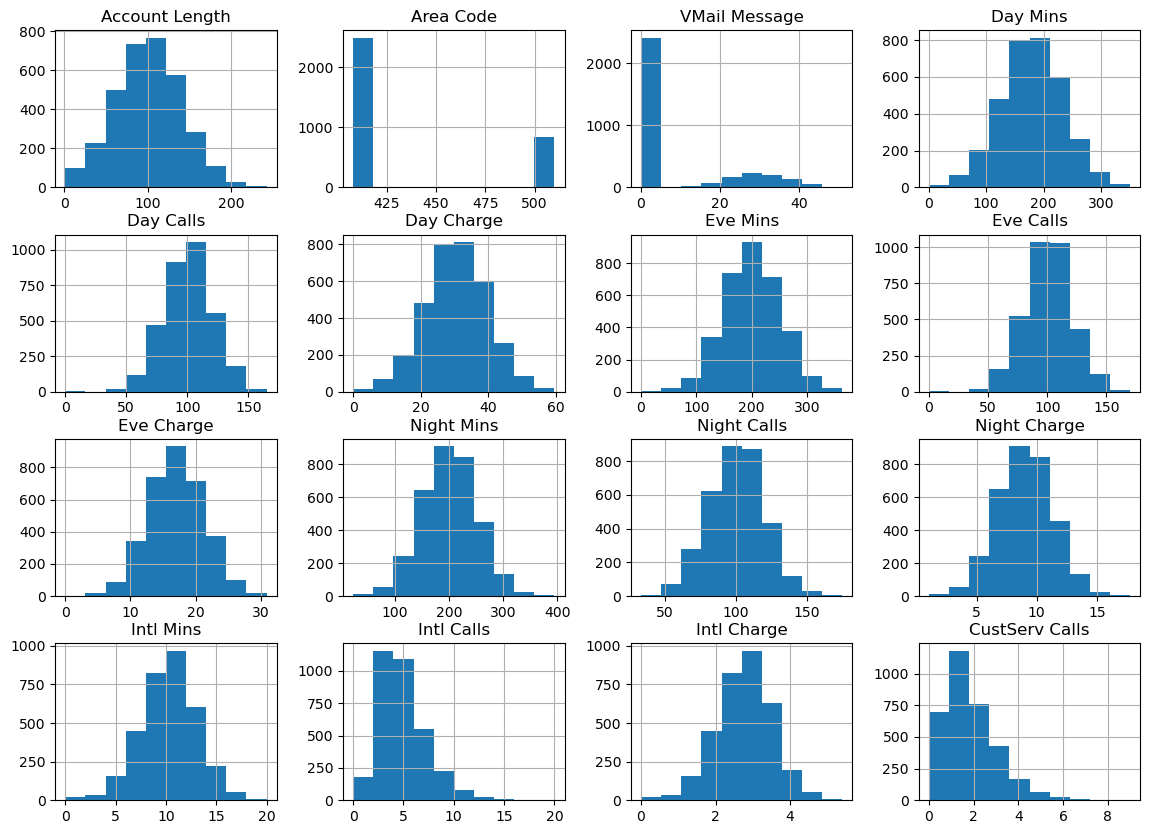

In [21]:
churn.hist(figsize=(14,10))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

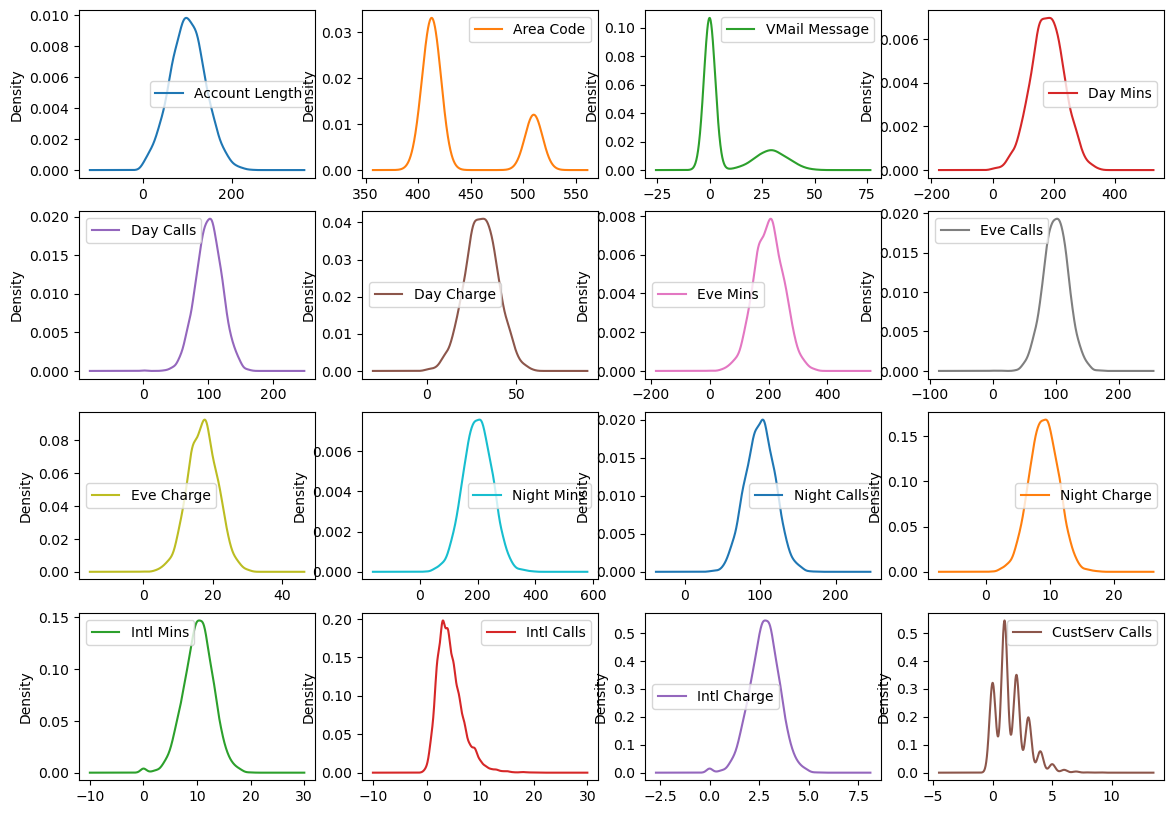

In [22]:
churn.plot(figsize=(14,10), kind='density', subplots=True, layout=(4, 4), sharex=False)

<Axes: xlabel='CustServ Calls', ylabel='Density'>

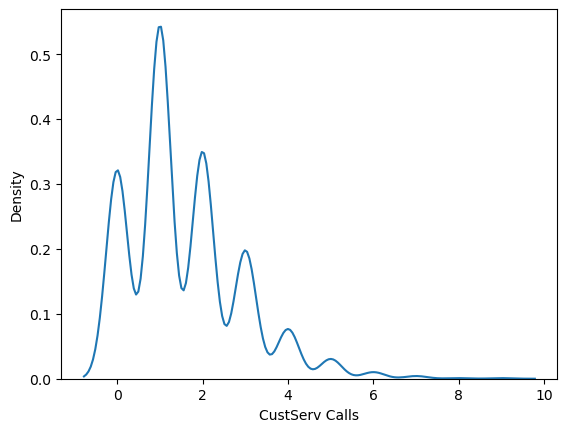

In [23]:
sns.kdeplot(churn["CustServ Calls"])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(1, 0, 'Account Length'),
  Text(2, 0, 'Area Code'),
  Text(3, 0, 'VMail Message'),
  Text(4, 0, 'Day Mins'),
  Text(5, 0, 'Day Calls'),
  Text(6, 0, 'Day Charge'),
  Text(7, 0, 'Eve Mins'),
  Text(8, 0, 'Eve Calls'),
  Text(9, 0, 'Eve Charge'),
  Text(10, 0, 'Night Mins'),
  Text(11, 0, 'Night Calls'),
  Text(12, 0, 'Night Charge'),
  Text(13, 0, 'Intl Mins'),
  Text(14, 0, 'Intl Calls'),
  Text(15, 0, 'Intl Charge'),
  Text(16, 0, 'CustServ Calls')])

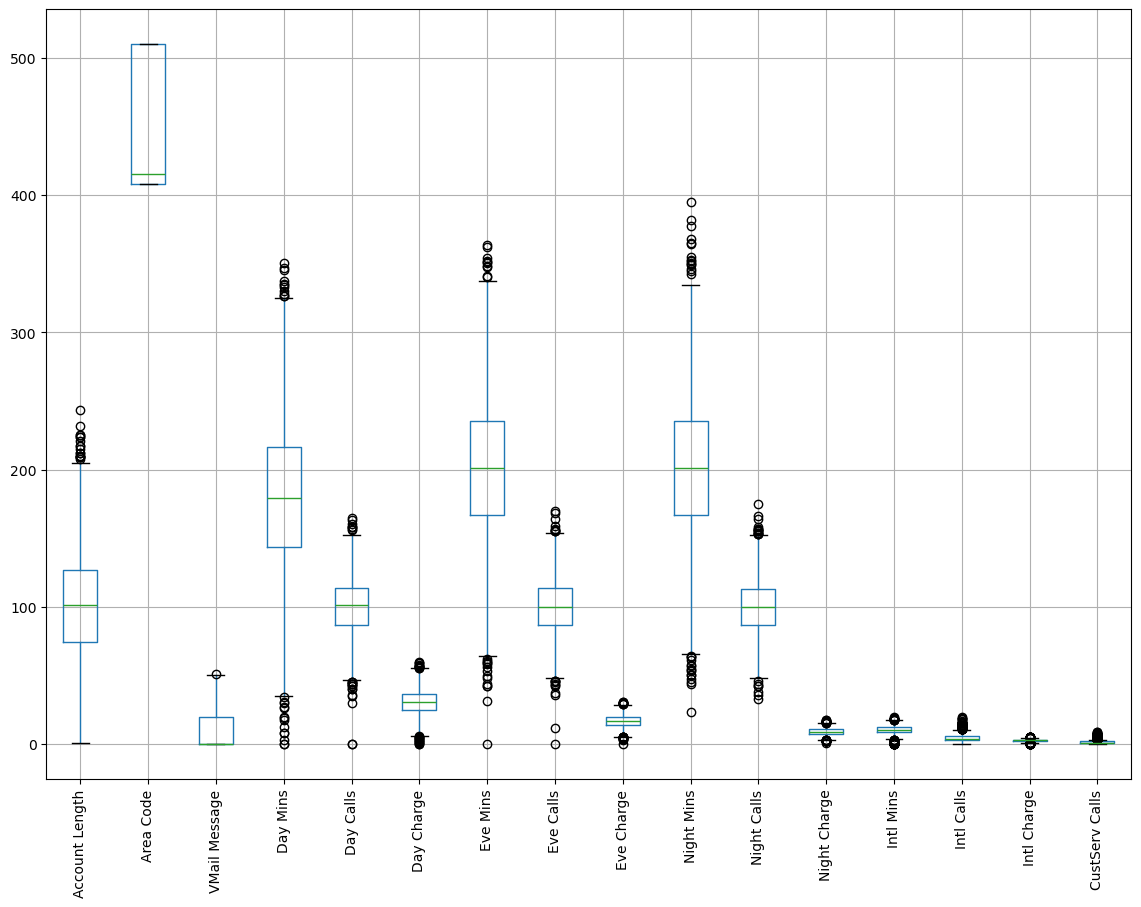

In [24]:
churn.boxplot(figsize=(14,10))
plt.xticks(rotation=90)

Account Length       Axes(0.125,0.712609;0.168478x0.167391)
Area Code         Axes(0.327174,0.712609;0.168478x0.167391)
VMail Message     Axes(0.529348,0.712609;0.168478x0.167391)
Day Mins          Axes(0.731522,0.712609;0.168478x0.167391)
Day Calls            Axes(0.125,0.511739;0.168478x0.167391)
Day Charge        Axes(0.327174,0.511739;0.168478x0.167391)
Eve Mins          Axes(0.529348,0.511739;0.168478x0.167391)
Eve Calls         Axes(0.731522,0.511739;0.168478x0.167391)
Eve Charge            Axes(0.125,0.31087;0.168478x0.167391)
Night Mins         Axes(0.327174,0.31087;0.168478x0.167391)
Night Calls        Axes(0.529348,0.31087;0.168478x0.167391)
Night Charge       Axes(0.731522,0.31087;0.168478x0.167391)
Intl Mins                Axes(0.125,0.11;0.168478x0.167391)
Intl Calls            Axes(0.327174,0.11;0.168478x0.167391)
Intl Charge           Axes(0.529348,0.11;0.168478x0.167391)
CustServ Calls        Axes(0.731522,0.11;0.168478x0.167391)
dtype: object

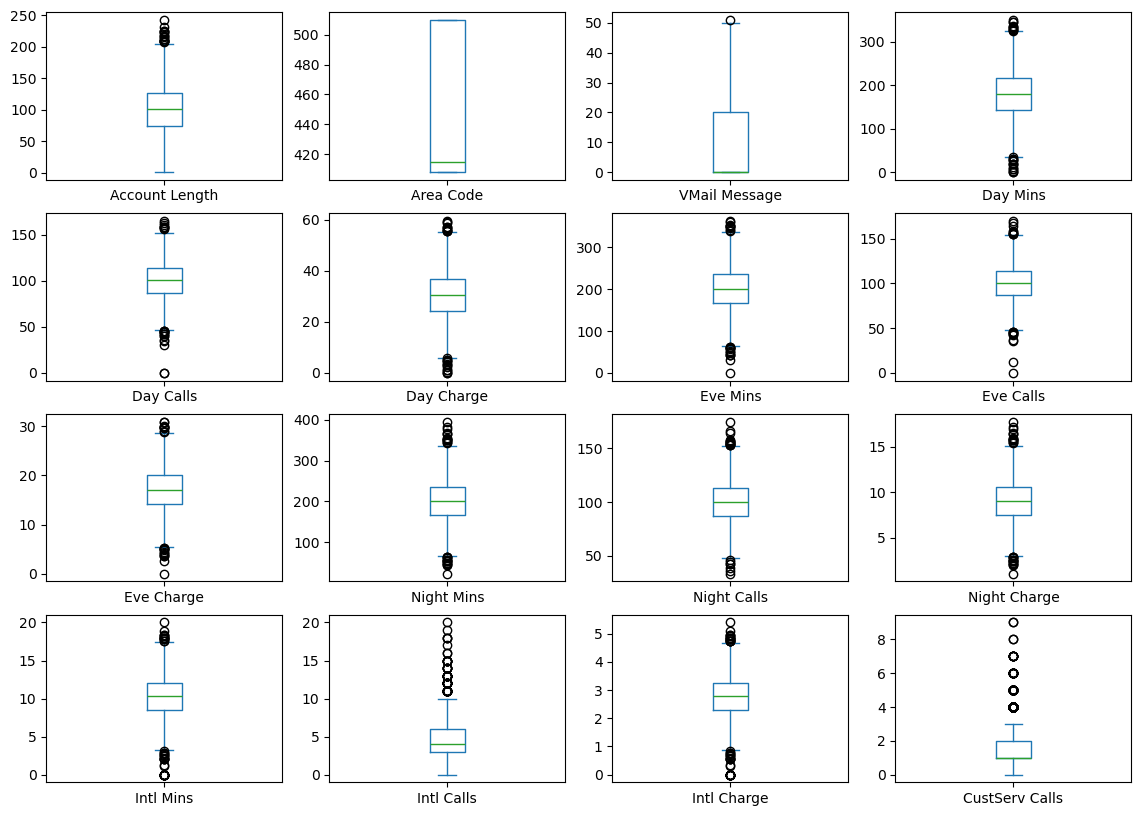

In [25]:
churn.plot(figsize=(14,10), kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False)

<Axes: xlabel='Churn?', ylabel='CustServ Calls'>

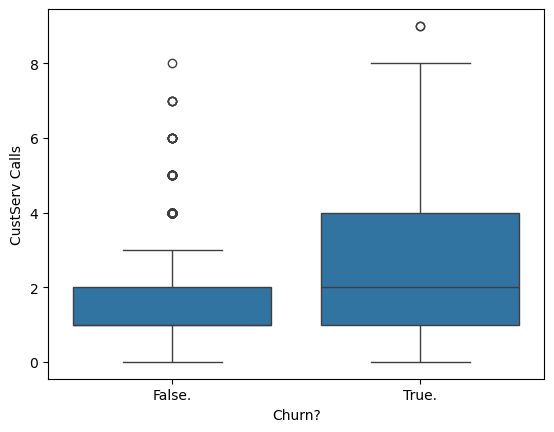

In [26]:
sns.boxplot(x = churn["Churn?"], y = churn["CustServ Calls"], data = churn)

In [27]:
churn_csc_T = churn[churn["Churn?"] == "True."] ["CustServ Calls"]
churn_csc_F = churn[churn["Churn?"] == "False."] ["CustServ Calls"]

([<matplotlib.axis.XTick at 0x7fcfce594230>,
 [Text(0.45, 0, '0'),
  Text(1.35, 0, '1'),
  Text(2.25, 0, '2'),
  Text(3.1500000000000004, 0, '3'),
  Text(4.05, 0, '4'),
  Text(4.95, 0, '5'),
  Text(5.8500000000000005, 0, '6'),
  Text(6.75, 0, '7'),
  Text(7.65, 0, '8'),
  Text(8.549999999999999, 0, '9')])

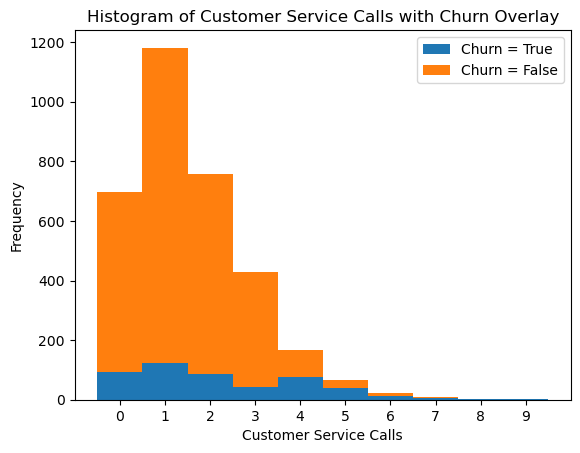

In [28]:
plt.hist([churn_csc_T, churn_csc_F], bins = 10, stacked = True)
plt.legend(['Churn = True', 'Churn = False'])
plt.title('Histogram of Customer Service Calls with Churn Overlay')
plt.xlabel('Customer Service Calls')
plt.ylabel('Frequency')
xlabels = np.arange(10)  # the labels
xpos = [x*0.9+0.45 for x in xlabels]  # the label locations
plt.xticks(xpos, xlabels)

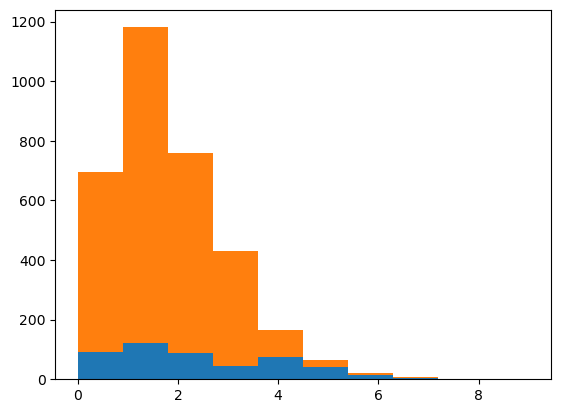

In [29]:
(n, bins, patches) = plt.hist([churn_csc_T, churn_csc_F], bins = 10, stacked = True)

In [30]:
n[1] = n[1] - n[0]
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:, None]
ourbins = np.column_stack((bins[0:10], bins[1:11]))

([<matplotlib.axis.XTick at 0x7fcfce4c4c50>,
 [Text(0.0, 0, '0'),
  Text(0.9000000000000001, 0, '1'),
  Text(1.8, 0, '2'),
  Text(2.7, 0, '3'),
  Text(3.5999999999999996, 0, '4'),
  Text(4.5, 0, '5'),
  Text(5.4, 0, '6'),
  Text(6.3, 0, '7'),
  Text(7.2, 0, '8'),
  Text(8.1, 0, '9')])

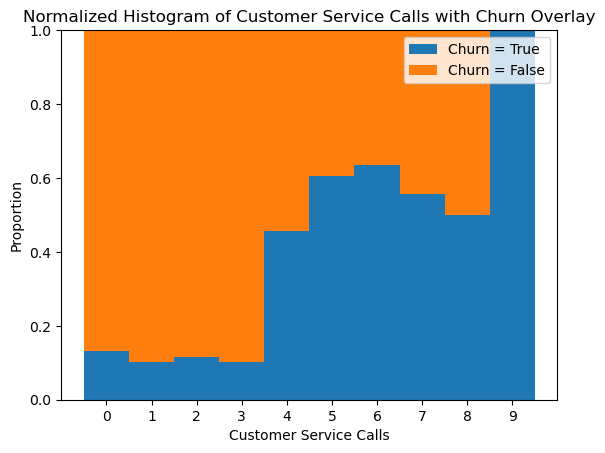

In [31]:
plt.bar(x = ourbins[:,0], height = n_norm[:,0], width = ourbins[:, 1] - ourbins[:, 0])
plt.bar(x = ourbins[:,0], height = n_norm[:,1], width = ourbins[:, 1] - ourbins[:, 0], bottom = n_norm[:,0])
plt.legend(['Churn = True', 'Churn = False'])
plt.title('Normalized Histogram of Customer Service Calls with Churn Overlay')
plt.xlabel('Customer Service Calls')
plt.ylabel('Proportion')
xpos = [x-0.45 for x in xpos]
plt.xticks(xpos, xlabels)

In [33]:
import plotly.express as px
px.histogram(churn, x="CustServ Calls", color="Churn?", barnorm='fraction')
fig = px.histogram(churn, x="CustServ Calls", color="Churn?", barnorm='fraction')
fig.data = fig.data[::-1]
fig.show()

<Axes: xlabel='Day Mins', ylabel='Eve Mins'>

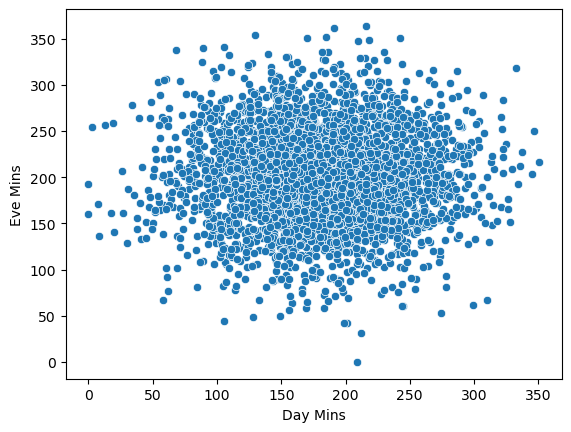

In [34]:
sns.scatterplot(x = "Day Mins", y = "Eve Mins", data = churn)

<Axes: xlabel='Day Mins', ylabel='Eve Mins'>

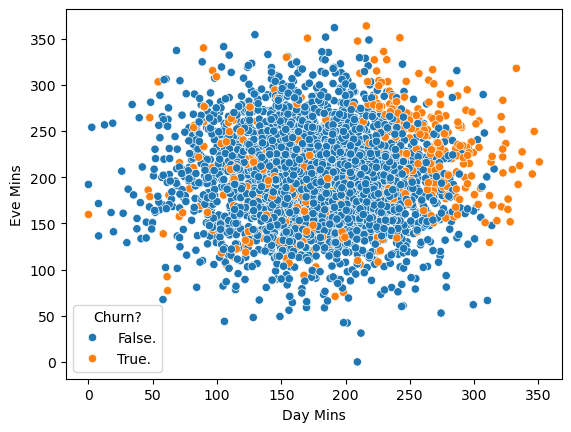

In [35]:
sns.scatterplot(x = "Day Mins", y = "Eve Mins", hue = "Churn?", data = churn)

<Axes: xlabel='Day Mins', ylabel='CustServ Calls'>

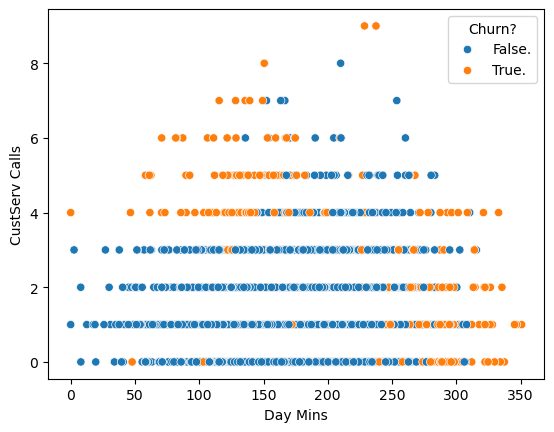

In [36]:
sns.scatterplot(x = "Day Mins", y = "CustServ Calls", hue = "Churn?", data = churn)

In [37]:
churn['Eve Mins binned'] = pd.cut(x = churn['Eve Mins'], bins = [0, 160.01, 240.01, 400], labels=["Low", "Medium", "High"], right = False)

<Axes: title={'center': 'Bar Graph of Evening Minutes (Binned) with Churn Overlay'}, xlabel='Churn?'>

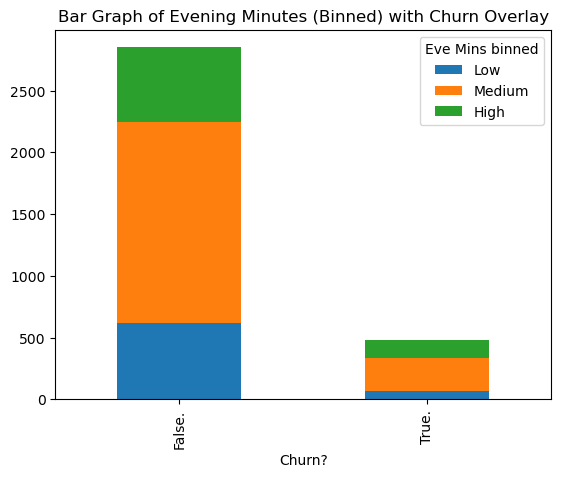

In [38]:
churn_crosstab = pd.crosstab(churn["Churn?"], churn["Eve Mins binned"])
churn_crosstab.plot(kind = 'bar', stacked = True, title = 'Bar Graph of Evening Minutes (Binned) with Churn Overlay')

<Axes: title={'center': 'Bar Graph of Evening Minutes (Binned) with Churn Overlay'}, xlabel='Eve Mins binned'>

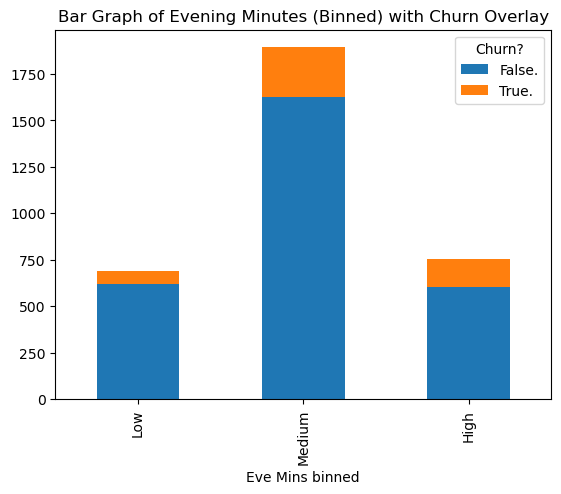

In [39]:
# and pivoted:
churn_crosstab = pd.crosstab(churn["Eve Mins binned"], churn["Churn?"])
churn_crosstab.plot(kind = 'bar', stacked = True, title = 'Bar Graph of Evening Minutes (Binned) with Churn Overlay')

In [40]:
churn_df = churn.drop(columns=['State','Churn?'])

array([[<Axes: xlabel='Account Length', ylabel='Account Length'>,
        <Axes: xlabel='Area Code', ylabel='Account Length'>,
        <Axes: xlabel='VMail Message', ylabel='Account Length'>,
        <Axes: xlabel='Day Mins', ylabel='Account Length'>,
        <Axes: xlabel='Day Calls', ylabel='Account Length'>,
        <Axes: xlabel='Day Charge', ylabel='Account Length'>,
        <Axes: xlabel='Eve Mins', ylabel='Account Length'>,
        <Axes: xlabel='Eve Calls', ylabel='Account Length'>,
        <Axes: xlabel='Eve Charge', ylabel='Account Length'>,
        <Axes: xlabel='Night Mins', ylabel='Account Length'>,
        <Axes: xlabel='Night Calls', ylabel='Account Length'>,
        <Axes: xlabel='Night Charge', ylabel='Account Length'>,
        <Axes: xlabel='Intl Mins', ylabel='Account Length'>,
        <Axes: xlabel='Intl Calls', ylabel='Account Length'>,
        <Axes: xlabel='Intl Charge', ylabel='Account Length'>,
        <Axes: xlabel='CustServ Calls', ylabel='Account Length'>],


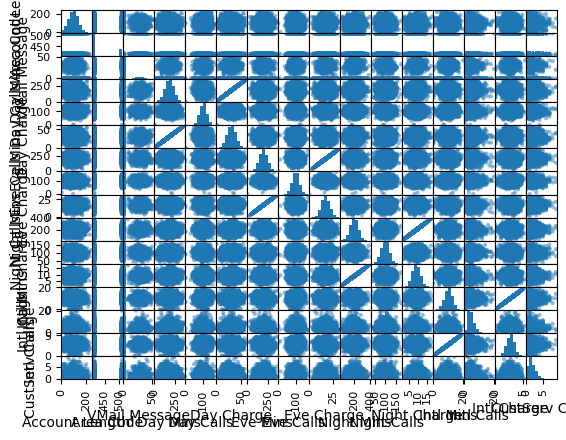

In [41]:
from pandas.plotting import scatter_matrix
scatter_matrix(churn)

In [42]:
# correlation matrix
correlations = churn.corr(numeric_only = True)
correlations

Account Length  Area Code  VMail Message  Day Mins  Day Calls  \
Account Length        1.000000  -0.012463      -0.004628  0.006216   0.038470   
Area Code            -0.012463   1.000000      -0.001994 -0.008264  -0.009646   
VMail Message        -0.004628  -0.001994       1.000000  0.000778  -0.009548   
Day Mins              0.006216  -0.008264       0.000778  1.000000   0.006750   
Day Calls             0.038470  -0.009646      -0.009548  0.006750   1.000000   
Day Charge            0.006214  -0.008264       0.000776  1.000000   0.006753   
Eve Mins             -0.006757   0.003580       0.017562  0.007043  -0.021451   
Eve Calls             0.019260  -0.011886      -0.005864  0.015769   0.006462   
Eve Charge           -0.006745   0.003607       0.017578  0.007029  -0.021449   
Night Mins           -0.008955  -0.005825       0.007681  0.004323   0.022938   
Night Calls          -0.013176   0.016522       0.007123  0.022972  -0.019557   
Night Charge         -0.008960  -0.005845       0.007663  0.004300   0.022927   
Intl Mins             0.009514  -0.018288       0.002856 -0.010155   0.021565   
Intl Calls            0.020661  -0.024179       0.013957  0.008033   0.004574   
Intl Charge           0.009546  -0.018395       0.002884 -0.010092   0.021666   
CustServ Calls       -0.003796   0.027572      -0.013263 -0.013423  -0.018942   

                Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  \
Account Length    0.006214 -0.006757   0.019260   -0.006745   -0.008955   
Area Code        -0.008264  0.003580  -0.011886    0.003607   -0.005825   
VMail Message     0.000776  0.017562  -0.005864    0.017578    0.007681   
Day Mins          1.000000  0.007043   0.015769    0.007029    0.004323   
Day Calls         0.006753 -0.021451   0.006462   -0.021449    0.022938   
Day Charge        1.000000  0.007050   0.015769    0.007036    0.004324   
Eve Mins          0.007050  1.000000  -0.011430    1.000000   -0.012584   
Eve Calls         0.015769 -0.011430   1.000000   -0.011423   -0.002093   
Eve Charge        0.007036  1.000000  -0.011423    1.000000   -0.012592   
Night Mins        0.004324 -0.012584  -0.002093   -0.012592    1.000000   
Night Calls       0.022972  0.007586   0.007710    0.007596    0.011204   
Night Charge      0.004301 -0.012593  -0.002056   -0.012601    0.999999   
Intl Mins        -0.010157 -0.011035   0.008703   -0.011043   -0.015207   
Intl Calls        0.008032  0.002541   0.017434    0.002541   -0.012353   
Intl Charge      -0.010094 -0.011067   0.008674   -0.011074   -0.015180   
CustServ Calls   -0.013427 -0.012985   0.002423   -0.012987   -0.009288   

                Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
Account Length    -0.013176     -0.008960   0.009514    0.020661     0.009546   
Area Code          0.016522     -0.005845  -0.018288   -0.024179    -0.018395   
VMail Message      0.007123      0.007663   0.002856    0.013957     0.002884   
Day Mins           0.022972      0.004300  -0.010155    0.008033    -0.010092   
Day Calls         -0.019557      0.022927   0.021565    0.004574     0.021666   
Day Charge         0.022972      0.004301  -0.010157    0.008032    -0.010094   
Eve Mins           0.007586     -0.012593  -0.011035    0.002541    -0.011067   
Eve Calls          0.007710     -0.002056   0.008703    0.017434     0.008674   
Eve Charge         0.007596     -0.012601  -0.011043    0.002541    -0.011074   
Night Mins         0.011204      0.999999  -0.015207   -0.012353    -0.015180   
Night Calls        1.000000      0.011188  -0.013605    0.000305    -0.013630   
Night Charge       0.011188      1.000000  -0.015214   -0.012329    -0.015186   
Intl Mins         -0.013605     -0.015214   1.000000    0.032304     0.999993   
Intl Calls         0.000305     -0.012329   0.032304    1.000000     0.032372   
Intl Charge       -0.013630     -0.015186   0.999993    0.032372     1.000000   
CustServ Calls    -0.012802     -0.009277  -0.009640   -0.017561  

[Text(0, 0, 'Account Length'),
 Text(0, 1, 'Area Code'),
 Text(0, 2, 'VMail Message'),
 Text(0, 3, 'Day Mins'),
 Text(0, 4, 'Day Calls'),
 Text(0, 5, 'Day Charge'),
 Text(0, 6, 'Eve Mins'),
 Text(0, 7, 'Eve Calls'),
 Text(0, 8, 'Eve Charge'),
 Text(0, 9, 'Night Mins'),
 Text(0, 10, 'Night Calls'),
 Text(0, 11, 'Night Charge'),
 Text(0, 12, 'Intl Mins'),
 Text(0, 13, 'Intl Calls'),
 Text(0, 14, 'Intl Charge'),
 Text(0, 15, 'CustServ Calls')]

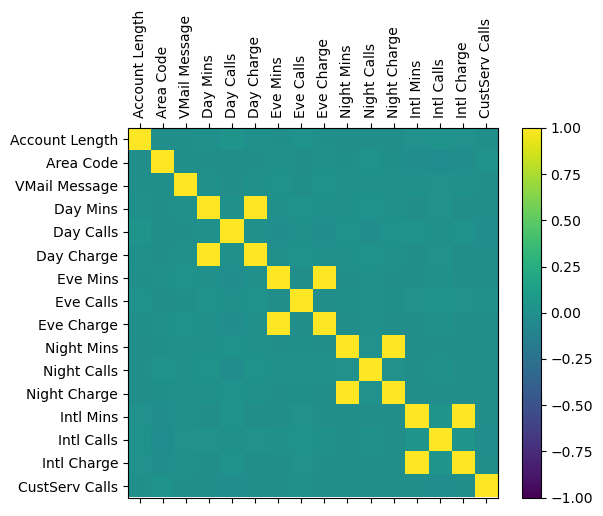

In [43]:
# plot correlation matrix (generic)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
# change the tick labels
ticks = range(0,16,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
numeric_columns = churn.select_dtypes(include='number')
ax.set_xticklabels(numeric_columns.columns, rotation=90)
ax.set_yticklabels(numeric_columns.columns)


In [44]:
churn["Churn?"] = np.where(churn["Churn?"] == "True.", True, False)
mean_day_mins = np.mean(churn["Day Mins"])

print("Mean of Day Mins:", mean_day_mins)

Mean of Day Mins: 179.77509750975094


In [45]:
churn_crosstab = pd.crosstab(churn["Churn?"], churn["Int'l Plan"],margins=False)

In [46]:
pd.crosstab(churn["Churn?"], churn["Int'l Plan"], margins=True)

Int'l Plan    no  yes   All
Churn?                     
False       2664  186  2850
True         346  137   483
All         3010  323  3333

<Axes: xlabel="Int'l Plan", ylabel='count'>

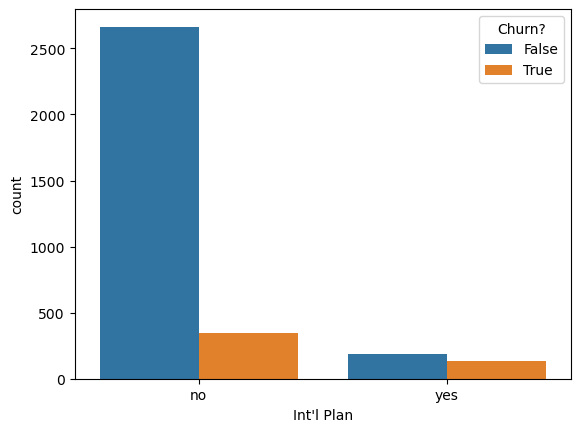

In [47]:
sns.countplot(x="Int'l Plan", hue="Churn?", data=churn)

<Axes: xlabel="Int'l Plan">

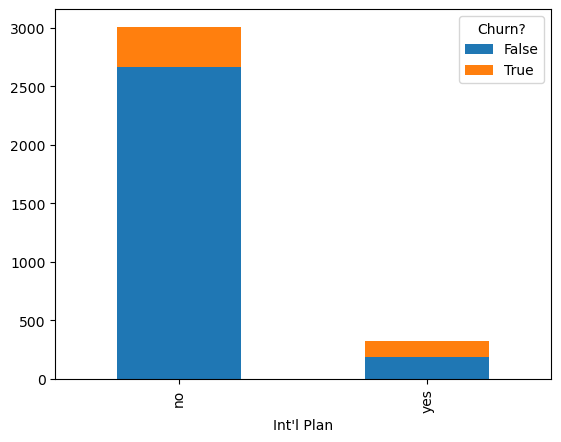

In [48]:
churn_crosstab = churn_crosstab.transpose()
churn_crosstab.plot(kind = 'bar', stacked = True)

In [49]:
churn_crosstab_norm = churn_crosstab.div(churn_crosstab.sum(axis=1), axis=0)
churn_crosstab_norm

Churn?         False     True 
Int'l Plan                    
no          0.885050  0.114950
yes         0.575851  0.424149

<Axes: xlabel="Int'l Plan">

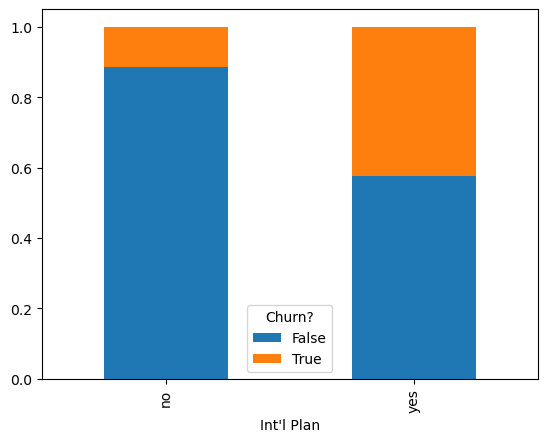

In [50]:
churn_crosstab_norm.plot(kind = 'bar', stacked = True)

In [51]:
# KNN- K nearest neighbours
import pandas as pd
import numpy as np
from numpy import arange 
from pandas import set_option
from pandas.plotting import scatter_matrix 
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline - command to show graphs properly 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# takes entire dataset and cuts into 2 different ones (train and test); shuffling them (since dataset may be initially sorted)

from sklearn.model_selection import KFold 
# folding training set in K separate folds (different subsets of training data created)
# over different subsets...the algorithm is being validated - process called cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
# roughly speaking, grid search looks at the different parameters of the algorithm
# re-runs with new K or distance function, voting schemes, etc. 
# (ex in KNN: find optimal K - highest accuracy or whatever or lowest MSE in regressions)

from sklearn.neighbors import KNeighborsRegressor # regression for numerical target and classifier for categorical
from sklearn.metrics import mean_squared_error # simple/basic measure to evalute algorithm performance 

In [52]:
filename = "Boston.data" # building/housing dataset 
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','MEDV']
boston = pd.read_table(filename, sep=r'\s+',names=names)
boston.head()

CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    N  0.538  6.575  65.2  4.0900    1  296.0     15.3   
1  0.02731   0.0   7.07    N  0.469  6.421  78.9  4.9671    2  242.0     17.8   
2  0.02729   0.0   7.07    N  0.469  7.185  61.1  4.9671    2  242.0     17.8   
3  0.03237   0.0   2.18    N  0.458  6.998  45.8  6.0622    3  222.0     18.7   
4  0.06905   0.0   2.18    N  0.458  7.147  54.2  6.0622    3  222.0     18.7   

   MEDV  
0  24.0  
1  21.6  
2  34.7  
3  33.4  
4  36.2

In [53]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  MEDV     506 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 47.6+ KB


In [54]:
print(boston.shape)
boston.count()

(506, 12)


CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
MEDV       506
dtype: int64

In [55]:
boston.head(10)

CRIM    ZN  INDUS CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31    N  0.538  6.575   65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07    N  0.469  6.421   78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07    N  0.469  7.185   61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18    N  0.458  6.998   45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18    N  0.458  7.147   54.2  6.0622    3  222.0   
5  0.02985   0.0   2.18    N  0.458  6.430   58.7  6.0622    3  222.0   
6  0.08829  12.5   7.87    N  0.524  6.012   66.6  5.5605    5  311.0   
7  0.14455  12.5   7.87    N  0.524  6.172   96.1  5.9505    5  311.0   
8  0.21124  12.5   7.87    N  0.524  5.631  100.0  6.0821    5  311.0   
9  0.17004  12.5   7.87    N  0.524  6.004   85.9  6.5921    5  311.0   

   PTRATIO  MEDV  
0     15.3  24.0  
1     17.8  21.6  
2     17.8  34.7  
3     18.7  33.4  
4     18.7  36.2  
5     18.7  28.7  
6     15.2  22.9  
7     15.2  27.1  
8     15.2  16.5  
9     15.2  18.9

In [56]:
boston["CHAS"] = boston["CHAS"].map({'Y': 1, 'N': 0}) 

In [57]:
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO  MEDV  
0     15.3  24.0  
1     17.8  21.6  
2     17.8  34.7  
3     18.7  33.4  
4     18.7  36.2

In [58]:
boston.describe() # very differening ranges for each column/variable - differentt units, etc. 

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO        MEDV  
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  
mean    68.574901    3.795043    9.549407  408.237154   18.455534   22.532806  
std     28.148861    2.105710    8.707259  168.537116    2.164946    9.197104  
min      2.900000    1.129600    1.000000  187.000000   12.600000    5.000000  
25%     45.025000    2.100175    4.000000  279.000000   17.400000   17.025000  
50%     77.500000    3.207450    5.000000  330.000000   19.050000   21.200000  
75%     94.075000    5.188425   24.000000  666.000000   20.200000   25.000000  
max    100.000000   12.126500   24.000000  711.000000   22.000000   50.000000

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>],
       [<Axes: title={'center': 'CHAS'}>,
        <Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>],
       [<Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>,
        <Axes: title={'center': 'RAD'}>],
       [<Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'MEDV'}>]], dtype=object)

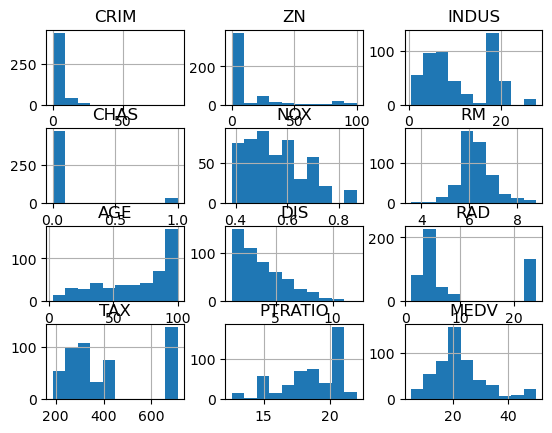

In [59]:
boston.hist(sharex=False, sharey=False) # not show x or y axes 

In [60]:
boston.corr() # correlation matrix 

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
MEDV    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO      MEDV  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.507787  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  1.000000

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

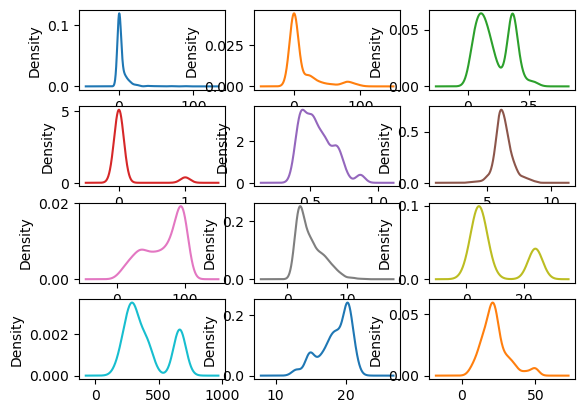

In [61]:
boston.plot(kind='density',subplots=True,layout=(4,3),sharex=False,sharey=False,legend=False)

CRIM          Axes(0.125,0.712609;0.227941x0.167391)
ZN         Axes(0.398529,0.712609;0.227941x0.167391)
INDUS      Axes(0.672059,0.712609;0.227941x0.167391)
CHAS          Axes(0.125,0.511739;0.227941x0.167391)
NOX        Axes(0.398529,0.511739;0.227941x0.167391)
RM         Axes(0.672059,0.511739;0.227941x0.167391)
AGE            Axes(0.125,0.31087;0.227941x0.167391)
DIS         Axes(0.398529,0.31087;0.227941x0.167391)
RAD         Axes(0.672059,0.31087;0.227941x0.167391)
TAX               Axes(0.125,0.11;0.227941x0.167391)
PTRATIO        Axes(0.398529,0.11;0.227941x0.167391)
MEDV           Axes(0.672059,0.11;0.227941x0.167391)
dtype: object

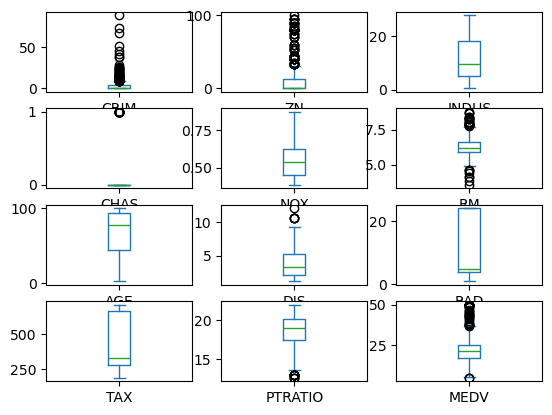

In [62]:
boston.plot(kind='box',subplots=True,layout=(4,3),sharex=False,sharey=False,legend=False)

array([[<Axes: xlabel='CRIM', ylabel='CRIM'>,
        <Axes: xlabel='ZN', ylabel='CRIM'>,
        <Axes: xlabel='INDUS', ylabel='CRIM'>,
        <Axes: xlabel='CHAS', ylabel='CRIM'>,
        <Axes: xlabel='NOX', ylabel='CRIM'>,
        <Axes: xlabel='RM', ylabel='CRIM'>,
        <Axes: xlabel='AGE', ylabel='CRIM'>,
        <Axes: xlabel='DIS', ylabel='CRIM'>,
        <Axes: xlabel='RAD', ylabel='CRIM'>,
        <Axes: xlabel='TAX', ylabel='CRIM'>,
        <Axes: xlabel='PTRATIO', ylabel='CRIM'>,
        <Axes: xlabel='MEDV', ylabel='CRIM'>],
       [<Axes: xlabel='CRIM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='INDUS', ylabel='ZN'>,
        <Axes: xlabel='CHAS', ylabel='ZN'>,
        <Axes: xlabel='NOX', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='AGE', ylabel='ZN'>,
        <Axes: xlabel='DIS', ylabel='ZN'>,
        <Axes: xlabel='RAD', ylabel='ZN'>,
        <Axes: xlabel='TAX', ylabel='ZN'>,
        <Axes: xlabe

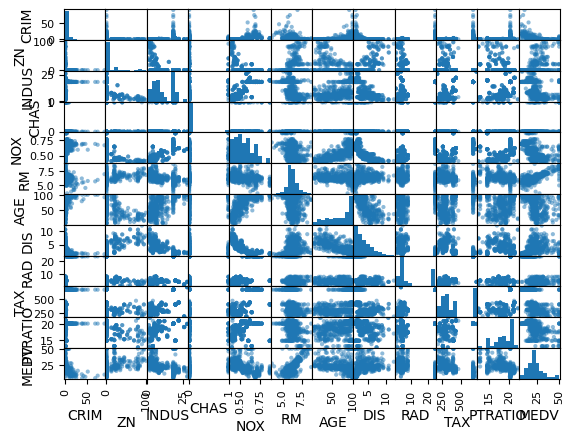

In [63]:
scatter_matrix(boston)

<Axes: >

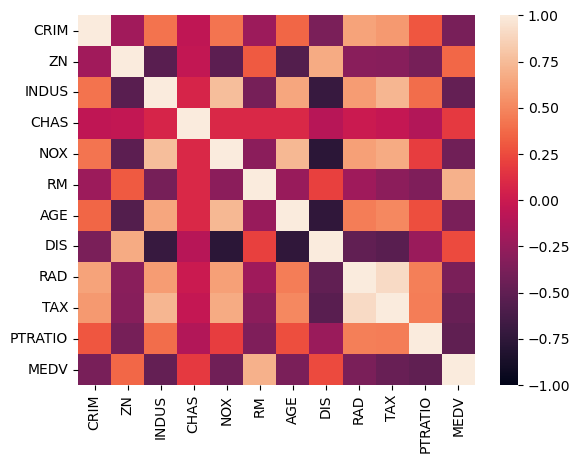

In [64]:
sns.heatmap(boston.corr(method='pearson'),vmin=-1,vmax=1)

In [65]:
# MachineLearning Part 
# Oldest version - extracting data from the dataframe 

array = boston.values # extract raw values from df - making it a numpy array

In [66]:
X = array[:,0:11] # collecting the predictors, explanatory variables - all rows but which columns? 
# slicing the array - including all columns EXCEPT column 11 
print(X)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.0000e+00 2.9600e+02 1.5300e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 2.0000e+00 2.4200e+02 1.7800e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 2.0000e+00 2.4200e+02 1.7800e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 1.0000e+00 2.7300e+02 2.1000e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 1.0000e+00 2.7300e+02 2.1000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 1.0000e+00 2.7300e+02 2.1000e+01]]


In [67]:
Y = array[:,-1] # y-variables/response variables' data sliced 
print(Y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [68]:
# another way to access select rows/columns of the dataframe - BUT NOT ARRAY...IT IS STILL A PD DATAFRAME 
X = boston.iloc[:,:11]
Y = boston.iloc[:,-1]
print(X.head())
print('\n')
print(Y.head()) # single column...thus, a pandas SERIES 

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0     15.3
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0     17.8
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0     17.8
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0     18.7
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0     18.7


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [69]:
# splitting the data into training and test sets 
test_size = 0.2
seed = 42 # randomization of the dataset...shuffling the data
# any number works! allows to reproduce the same run again! 

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_size,random_state=seed)
# we will run the x_test with algorithm then compare to actuals y_test to compute error rate

In [71]:
# K-fold CV approach 
num_folds = 10
seed = 42
scoring = 'neg_mean_squared_error' # max number of negative MSE - looking to max (minimizing errors)

In [72]:
# working on numerical variable (response)...thus it is a regressor KNN 
model = KNeighborsRegressor()

In [73]:
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed) # folding of the dataset 
# to have a look at the kfolds 
kfold.get_n_splits(X_train)
kfold

KFold(n_splits=10, random_state=42, shuffle=True)

In [74]:
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
msg = 'KNN: %f (%f)' % (cv_results.mean(), cv_results.std())
print(msg)

KNN: -57.216234 (23.988016)


In [75]:
scaler = StandardScaler().fit(X_train) 
rescaledX_train = scaler.transform(X_train)

In [76]:
k_values = np.arange(1,22) # different k values 

In [77]:
param_grid = dict(n_neighbors=k_values) 

In [78]:
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

In [79]:
grid_results = grid.fit(rescaledX_train, Y_train)

In [80]:
print("Best: %f using %s" % (grid_results.best_score_, grid_results.best_params_))

Best: -23.182775 using {'n_neighbors': np.int64(2)}


In [81]:
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_["std_test_score"]
params = grid_results.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-37.513612 (13.286277) with: {'n_neighbors': np.int64(1)}
-23.182775 (8.851145) with: {'n_neighbors': np.int64(2)}
-24.367744 (10.275385) with: {'n_neighbors': np.int64(3)}
-26.126919 (11.408456) with: {'n_neighbors': np.int64(4)}
-28.587243 (12.941908) with: {'n_neighbors': np.int64(5)}
-29.510482 (13.130403) with: {'n_neighbors': np.int64(6)}
-30.282983 (12.235358) with: {'n_neighbors': np.int64(7)}
-30.435144 (12.127025) with: {'n_neighbors': np.int64(8)}
-30.538893 (11.775447) with: {'n_neighbors': np.int64(9)}
-30.940501 (11.966708) with: {'n_neighbors': np.int64(10)}
-31.408459 (12.776130) with: {'n_neighbors': np.int64(11)}
-31.220180 (12.662945) with: {'n_neighbors': np.int64(12)}
-31.122811 (13.180632) with: {'n_neighbors': np.int64(13)}
-31.391478 (13.469065) with: {'n_neighbors': np.int64(14)}
-31.225980 (13.916656) with: {'n_neighbors': np.int64(15)}
-31.673972 (14.405975) with: {'n_neighbors': np.int64(16)}
-31.930526 (14.976151) with: {'n_neighbors': np.int64(17)}
-31.978

Text(0, 0.5, 'Negative MSE')

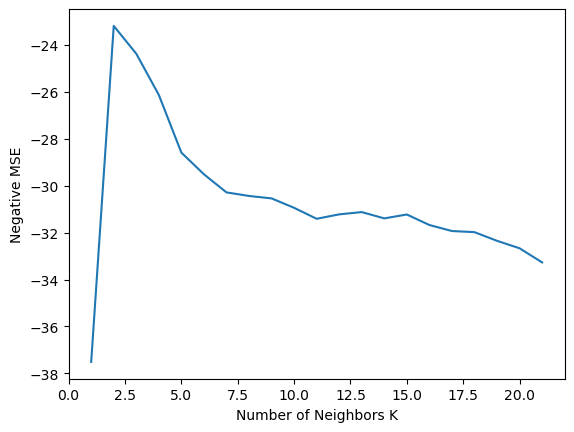

In [82]:
plt.plot(k_values, means)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Negative MSE")

In [83]:
scaler = StandardScaler().fit(X_train) 
rescaledX_train = scaler.transform(X_train) # scaling ONLY happing on TRAINING data 

In [84]:
model = KNeighborsRegressor(n_neighbors=2) # since we know which K works best 
model.fit(rescaledX_train, Y_train)

KNeighborsRegressor(n_neighbors=2)

In [85]:
rescaledX_test = scaler.transform(X_test) # SAME SCALING used on TEST data 

In [86]:
estimates = model.predict(rescaledX_test)
print(estimates)

[27.25 33.15 17.65 22.9  16.   23.45 18.   17.95 16.2  19.35 22.35 21.05
 11.75 24.7  20.7  24.1  18.9  10.5  43.15 13.2  22.9  27.   15.55 21.3
 11.15 16.4  23.35 13.4  20.5  19.35 24.5  21.75 20.7  17.35 13.35 15.5
 27.65 19.8  21.55 22.9  19.65 30.9  43.15 20.8  21.7  10.4  14.05 22.9
 21.15 27.25 25.   29.2  16.55 23.05 41.9  21.8  13.95 32.6  24.4  18.15
 23.9  28.7  28.75 21.5  21.65 20.5  10.8  25.45 31.4  21.6  20.25 24.1
 10.55 18.4  24.7   9.7  19.35 43.15 10.55 11.65 23.15 24.35 23.3  12.65
 20.95 26.3  13.75 23.05 25.5  18.6  23.3   7.85 18.65 20.9  18.45 18.65
 12.05 12.85 12.6  20.8  21.6  24.7 ]


In [87]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
## Tunable KNN

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [3]:
test = pd.read_csv("EVtripsGTAtest.csv")
print(test.head())
print(test.shape)

         Date  Distance driven (km) Driving time (h)  Average speed (km/h)
0  2016-02-05                     9            00:18                    31
1  2016-02-06                    12            00:30                    24
2  2016-02-28                    35            01:10                    30
3  2016-03-05                    40            00:56                    43
4  2016-03-08                     9            00:22                    26
(51, 4)


In [4]:
def to_minutes(time_str):
    hours, minutes = map(int, time_str.split(":"))
    return hours * 60 + minutes

test["Driving time (h)"] = test["Driving time (h)"].astype(str).apply(to_minutes)

In [5]:
X = test.drop(columns=["Average speed (km/h)", "Date"])
y = test["Average speed (km/h)"]

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# --- Define model and parameter grid ---
knn = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [8]:
grid = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [9]:
# --- Evaluate on the held-out test split ---
best_model = grid.best_estimator_
y_pred = best_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print("Best Parameters:", grid.best_params_)
print("Validation RMSE:", rmse)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Validation RMSE: 3.1976738114728023


In [10]:
final_predictions = best_model.predict(X)

In [11]:
np.savetxt("hendawisamirpredictions.txt", final_predictions, fmt="%.6f")
print("Predictions saved to hendawisamirpredictions.txt")

Predictions saved to hendawisamirpredictions.txt


In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%pip install scikeras
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import GridSearchCV
! pip install pydot
from tensorflow.keras.layers import Input

2025-10-22 18:29:00.444867: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-22 18:29:00.475380: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI, in other operations, rebuild TensorFlow with the appropriate compiler flags.


  Using cached scikeras-0.13.0-py3-none-any.whl.metadata (3.1 kB)
Using cached scikeras-0.13.0-py3-none-any.whl (26 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached pydot-4.0.1-py3-none-any.whl.metadata (11 kB)
Using cached pydot-4.0.1-py3-none-any.whl (37 kB)


In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_all = scaler.fit_transform(X)

In [14]:
def build_model(units=16, activation='relu', learning_rate=0.01):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(units, activation=activation),
        Dense(units, activation=activation),
        Dense(1)
    ])
    optimizer = RMSprop(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

In [15]:
reg = KerasClassifier(model=build_model, verbose=1)

In [16]:
param_grid = {
    'model__units': [8, 16, 32],
    'model__activation': ['relu', 'sigmoid'],
    'model__learning_rate': [0.01, 0.001],
    'batch_size': [8, 16],
    'epochs': [20, 40, 60]
}

In [17]:
grid = GridSearchCV(reg, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=1)
grid.fit(X_train, y_train)

Epoch 1/20


/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 75.8232 - mae: 7.5441  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 64.7334 - mae: 6.8920  
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 53.7428 - mae: 6.2370 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 42.2204 - mae: 5.3728 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32.0392 - mae: 4.5581 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.5037 - mae: 3.9107 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.2163 - mae: 3.4761 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.4470 - mae: 3.4131 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.5369 - mae: 3.2654 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.8811 - mae: 3.2348 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.1621 - mae: 3.1351
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.3767 - mae: 3.0989 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.6978 - mae: 7.2511  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.8554 - mae: 6.4573 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48.1236 - mae: 5.8220 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.2487 - mae: 5.2017 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.8927 - mae: 4.5821 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.4692 - mae: 4.0836 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.9318 - mae: 3.6216 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.4963 - mae: 3.4625 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.9117 - mae: 3.4601 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.9989 - mae: 3.2957
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.7736 - mae: 3.2432 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.0732 - mae: 3.2295 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 90.4496 - mae: 8.2598  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.3575 - mae: 7.7579 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.8738 - mae: 7.2071  
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 62.9124 - mae: 6.7147 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53.6026 - mae: 6.1127 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 44.8847 - mae: 5.5337 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36.0996 - mae: 4.7876 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.3470 - mae: 4.3147 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26.9798 - mae: 4.1626 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.9818 - mae: 3.9852 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.9405 - mae: 3.9421 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.4536 - mae: 3.8052 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.8279 - mae: 7.3038  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 55.8440 - mae: 6.3632 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 41.6446 - mae: 5.3469 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28.4017 - mae: 4.3798 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.7860 - mae: 3.8885 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.0143 - mae: 3.4618 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.8394 - mae: 3.2996 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.6933 - mae: 3.1288
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.7636 - mae: 3.0246 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.5774 - mae: 2.7249 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.4507 - mae: 2.7224 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.7185 - mae: 2.5043 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.1

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.0478 - mae: 7.4272   
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 62.0270 - mae: 6.5158 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48.5993 - mae: 5.6563 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37.6704 - mae: 4.7057 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28.9577 - mae: 4.1001 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.9385 - mae: 3.7307 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.6777 - mae: 3.6163 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.3466 - mae: 3.3626 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.2761 - mae: 3.3015 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.1377 - mae: 3.4544
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.9203 - mae: 3.3267 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.6708 - mae: 3.2165 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 86.0849 - mae: 8.0935  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.7892 - mae: 7.2732 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 59.4137 - mae: 6.5178 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 44.1875 - mae: 5.5621 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29.8858 - mae: 4.3988 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.3430 - mae: 3.8205 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.4471 - mae: 3.3254 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.4562 - mae: 3.3344 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.3852 - mae: 3.1277
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.7660 - mae: 2.9143
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.7093 - mae: 2.7677 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.0201 - mae: 2.5713
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.21

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 61.9737 - mae: 6.7545  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32.2378 - mae: 4.7449 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.8421 - mae: 3.8004 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.4408 - mae: 3.3035 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.2554 - mae: 3.1137
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.6286 - mae: 3.1269
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.9586 - mae: 2.8983 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.3085 - mae: 3.2605
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.8981 - mae: 2.7711 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.7254 - mae: 2.7269
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.0884 - mae: 2.7562
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.0023 - mae: 2.3856  
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.6738 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 66.4458 - mae: 6.9310  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31.4465 - mae: 4.5636 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.0626 - mae: 3.7455 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.8725 - mae: 3.3930 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.3856 - mae: 3.2621
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.3199 - mae: 3.1162 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.1310 - mae: 2.7862
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.3012 - mae: 3.1722
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.4061 - mae: 2.8675
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.6636 - mae: 2.6376 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.0967 - mae: 2.6202 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.3534 - mae: 2.4489
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.0113

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.1063 - mae: 7.3126  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36.9459 - mae: 4.6936 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.2524 - mae: 3.9710 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.2425 - mae: 3.6263 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.7298 - mae: 3.6031 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.3151 - mae: 3.5496 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.0587 - mae: 3.0970 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.8133 - mae: 3.0347 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.3105 - mae: 2.9963
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.9943 - mae: 2.8691 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.9298 - mae: 2.8419 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.8862 - mae: 2.7563 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 86.6009 - mae: 8.0862  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 85.3536 - mae: 8.0152 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 84.4715 - mae: 7.9703 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.7446 - mae: 7.9276 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 83.0796 - mae: 7.8919 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 82.5101 - mae: 7.8599 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82.0292 - mae: 7.8298  
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.4806 - mae: 7.7978  
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 80.8803 - mae: 7.7634  
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 80.2426 - mae: 7.7268 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.6924 - mae: 7.6935 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 79.1350 - mae: 7.6601 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss:

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.4112 - mae: 7.4949  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.5257 - mae: 7.4509 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.9527 - mae: 7.4224 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.4373 - mae: 7.3947 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.9179 - mae: 7.3708  
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.3286 - mae: 7.3417 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.8357 - mae: 7.3170 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 73.3583 - mae: 7.2915 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.8692 - mae: 7.2655 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.3407 - mae: 7.2387 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 71.7454 - mae: 7.2086 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.1739 - mae: 7.1785  
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 85.7967 - mae: 8.0322   
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 85.0545 - mae: 7.9901  
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 84.6026 - mae: 7.9635  
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 84.2007 - mae: 7.9413 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 83.8055 - mae: 7.9181 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.4030 - mae: 7.8944   
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.0088 - mae: 7.8723 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 82.5943 - mae: 7.8480 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82.1622 - mae: 7.8225 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 81.7849 - mae: 7.8006 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 81.3599 - mae: 7.7756 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.9300 - mae: 7.7495 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - los

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.7464 - mae: 7.8614  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.4737 - mae: 7.7819 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.5290 - mae: 7.7254 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.7605 - mae: 7.6826 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.1228 - mae: 7.6445 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.3819 - mae: 7.6020 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 75.7386 - mae: 7.5641  
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.1366 - mae: 7.5306 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.3962 - mae: 7.4880 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 73.8363 - mae: 7.4537 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.0747 - mae: 7.4112 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 72.2718 - mae: 7.3632 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.0775 - mae: 7.5558  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.7333 - mae: 7.4956 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.7997 - mae: 7.4504 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.1465 - mae: 7.4176 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.3918 - mae: 7.3807 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.6284 - mae: 7.3440 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.9554 - mae: 7.3092 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.1001 - mae: 7.2687 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.2666 - mae: 7.2274 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 71.4343 - mae: 7.1839 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 70.6299 - mae: 7.1473 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.7398 - mae: 7.0993 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 87.3017 - mae: 8.1442  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 86.0828 - mae: 8.0757 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 85.1667 - mae: 8.0283 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 84.2554 - mae: 7.9773 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.3805 - mae: 7.9297 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82.5420 - mae: 7.8818 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.7077 - mae: 7.8361 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 80.8652 - mae: 7.7881 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.9855 - mae: 7.7388 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.1713 - mae: 7.6924 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 78.3621 - mae: 7.6441 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.4973 - mae: 7.5920 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82.6275 - mae: 7.9306  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.3229 - mae: 7.7553 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.0779 - mae: 7.6377 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.4071 - mae: 7.5398  
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.7633 - mae: 7.4470 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.0938 - mae: 7.3508 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.1681 - mae: 7.2359 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.3163 - mae: 7.1273  
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 66.6293 - mae: 7.0269 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.0997 - mae: 6.9316 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63.5751 - mae: 6.8311 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 62.1116 - mae: 6.7519 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.0360 - mae: 7.7341  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.0177 - mae: 7.5804 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.1883 - mae: 7.4901 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.4367 - mae: 7.4075 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.5132 - mae: 7.3140 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.0032 - mae: 7.2370 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.3510 - mae: 7.1518 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.5829 - mae: 7.0553  
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 67.7212 - mae: 6.9586  
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.8320 - mae: 6.8632 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63.6915 - mae: 6.7497 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 61.9230 - mae: 6.6522 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 86.3070 - mae: 8.0698   
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.9976 - mae: 7.9518 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82.3824 - mae: 7.8644 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.7415 - mae: 7.7669 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.2129 - mae: 7.6859 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.7625 - mae: 7.5974  
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.2582 - mae: 7.5237 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.9389 - mae: 7.4481 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.4370 - mae: 7.3697 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.7105 - mae: 7.2843 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.8679 - mae: 7.1754 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.2440 - mae: 7.0857 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.6593 - mae: 7.3690  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63.5897 - mae: 6.7410 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.8875 - mae: 6.3687 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52.1319 - mae: 5.9608 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 47.8990 - mae: 5.6879 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44.3013 - mae: 5.4654 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 41.5478 - mae: 5.2743 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.0888 - mae: 5.1253 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36.4602 - mae: 4.9118 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34.2254 - mae: 4.7478 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32.1261 - mae: 4.5949 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 30.0871 - mae: 4.4574 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.4624 - mae: 7.3606  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 67.1021 - mae: 6.7965 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 61.3376 - mae: 6.4833 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 56.9305 - mae: 6.1839 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 54.0195 - mae: 5.9956 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 51.2709 - mae: 5.8318 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49.1614 - mae: 5.6724 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 46.8158 - mae: 5.5078 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44.8543 - mae: 5.3594 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.9670 - mae: 5.2356 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41.1238 - mae: 5.1102 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.2059 - mae: 4.9668 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.5888 - mae: 7.1848  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 60.9481 - mae: 6.5732 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53.8921 - mae: 6.1295 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48.8428 - mae: 5.8174 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44.5498 - mae: 5.5362 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41.0003 - mae: 5.2845 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38.3972 - mae: 5.1169 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36.0913 - mae: 4.9564 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33.7307 - mae: 4.7931 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32.0456 - mae: 4.6476 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.1726 - mae: 4.5207 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28.7256 - mae: 4.4476 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.5459 - mae: 7.7719   
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 60.6249 - mae: 6.5673 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48.2559 - mae: 5.6971 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40.8483 - mae: 5.2524 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34.8439 - mae: 4.8285 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31.7731 - mae: 4.5983 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29.2952 - mae: 4.3751 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26.3727 - mae: 4.1495 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.7589 - mae: 4.0231 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.4305 - mae: 3.9049 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.9495 - mae: 3.8142 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.2204 - mae: 3.8102 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 56.7324 - mae: 6.0993  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.3053 - mae: 5.1798 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34.3547 - mae: 4.6462 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29.6041 - mae: 4.3839 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.1808 - mae: 4.2665 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.6303 - mae: 4.1420 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.1178 - mae: 4.0464 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.4701 - mae: 3.9998 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.8499 - mae: 3.9341 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.4965 - mae: 3.9040 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.1846 - mae: 3.9049 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.0192 - mae: 3.9044 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.9279 - mae: 7.4846   
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 59.4634 - mae: 6.4894 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48.8100 - mae: 5.7854 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41.8457 - mae: 5.3496 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37.4071 - mae: 5.0635 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33.6299 - mae: 4.7666 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.8353 - mae: 4.5791 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28.4533 - mae: 4.4406 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26.6890 - mae: 4.3090 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.9581 - mae: 4.2046 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.6762 - mae: 4.0999 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.0374 - mae: 4.0482 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 56.5115 - mae: 6.4085  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34.6139 - mae: 4.7512 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.0651 - mae: 4.2384 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.3195 - mae: 3.8178 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.8291 - mae: 3.8534 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.1549 - mae: 3.7742 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.5581 - mae: 3.7819 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.5897 - mae: 3.7999 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.7019 - mae: 3.7827 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.0550 - mae: 3.7809 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.5930 - mae: 3.7627 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.3581 - mae: 3.7473 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.2967 - mae: 7.1071   
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44.4235 - mae: 5.3001 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33.0792 - mae: 4.5940 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29.0926 - mae: 4.3617 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26.9282 - mae: 4.2371
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.8624 - mae: 4.0792
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.5290 - mae: 4.0007
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.6587 - mae: 3.9114
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.4220 - mae: 3.9134 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.4191 - mae: 3.9209 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.3917 - mae: 3.9410 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.1607 - mae: 3.9436
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.030

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 59.6476 - mae: 6.6934  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 34.6288 - mae: 4.8706 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26.0947 - mae: 4.2746 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.2054 - mae: 4.0716 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.5218 - mae: 3.9835 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.7493 - mae: 3.9243 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.7611 - mae: 3.9076 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.7327 - mae: 3.8951 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.0970 - mae: 3.9159 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.3471 - mae: 3.8604 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.0368 - mae: 3.8205 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.5676 - mae: 3.8211 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.8915 - mae: 7.4100   
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 72.8826 - mae: 7.3461 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.2424 - mae: 7.3079 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.6640 - mae: 7.2716 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.1088 - mae: 7.2359 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.5756 - mae: 7.2007  
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.0816 - mae: 7.1703 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.5768 - mae: 7.1383 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.9819 - mae: 7.0989 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.4900 - mae: 7.0657 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 67.9424 - mae: 7.0311 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 67.4275 - mae: 6.9985 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 90.9050 - mae: 8.2716   
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 89.6951 - mae: 8.2010 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 88.7985 - mae: 8.1453 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 88.0625 - mae: 8.1008 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 87.3729 - mae: 8.0560 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 86.7716 - mae: 8.0200 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 86.1015 - mae: 7.9785 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 85.4929 - mae: 7.9407 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 84.8683 - mae: 7.9001   
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 84.2430 - mae: 7.8631 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.6382 - mae: 7.8222  
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.0531 - mae: 7.7849  
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - los

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 94.3524 - mae: 8.5408  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 93.2629 - mae: 8.4708   
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 92.5675 - mae: 8.4307 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 91.9272 - mae: 8.3937 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 91.3401 - mae: 8.3577 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 90.7852 - mae: 8.3240  
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 90.2401 - mae: 8.2927 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 89.6756 - mae: 8.2595 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 89.0981 - mae: 8.2230  
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 88.5709 - mae: 8.1941 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 88.0547 - mae: 8.1639 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 87.5930 - mae: 8.1377 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.5448 - mae: 7.6395  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.2831 - mae: 7.5001 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.7177 - mae: 7.4037 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 72.2055 - mae: 7.3017 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.1240 - mae: 7.2336 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.8703 - mae: 7.1490 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.8681 - mae: 7.0830  
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 67.8039 - mae: 7.0187 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 66.6067 - mae: 6.9361 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.4740 - mae: 6.8654 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 64.4828 - mae: 6.8043 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63.6089 - mae: 6.7497 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.2110 - mae: 7.4824   
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.0137 - mae: 7.3576 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.4682 - mae: 7.2624 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.2636 - mae: 7.1966 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.0229 - mae: 7.1197 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.8500 - mae: 7.0482 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.7808 - mae: 6.9839 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.7614 - mae: 6.9204 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 67.7633 - mae: 6.8602 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 66.7210 - mae: 6.7920 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.8622 - mae: 6.7386   
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.0134 - mae: 6.6936 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss:

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 66.7729 - mae: 6.9077  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 64.5618 - mae: 6.7827 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 62.9642 - mae: 6.6852 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 61.6867 - mae: 6.6063 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 60.6606 - mae: 6.5456 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 59.5671 - mae: 6.4802 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 58.4026 - mae: 6.4129 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.3511 - mae: 6.3470 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 56.4030 - mae: 6.2942 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 55.3977 - mae: 6.2338 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 54.3894 - mae: 6.1739 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53.3860 - mae: 6.1130 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.8496 - mae: 7.5422  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.1680 - mae: 7.2435 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.3801 - mae: 7.0542 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.8374 - mae: 6.8925 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63.4897 - mae: 6.7475 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 61.6145 - mae: 6.6234 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 59.4133 - mae: 6.4769 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.5989 - mae: 6.3479 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 55.6770 - mae: 6.2219 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53.8932 - mae: 6.0986 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52.0658 - mae: 5.9733 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 50.3324 - mae: 5.8759 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.9869 - mae: 7.6519  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.8459 - mae: 7.3354 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.4786 - mae: 7.1583 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.5684 - mae: 6.9791 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 67.1669 - mae: 6.8224 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 64.6473 - mae: 6.6800 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 62.1340 - mae: 6.5229 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 60.1348 - mae: 6.3946 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 58.1016 - mae: 6.2607 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 56.0705 - mae: 6.1325 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 54.1222 - mae: 5.9999 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52.2456 - mae: 5.8837 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 50

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.6784 - mae: 7.2302  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.1906 - mae: 6.9943 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.0600 - mae: 6.8051  
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 62.4956 - mae: 6.6558 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 60.2174 - mae: 6.5187 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.9687 - mae: 6.3922 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 55.9995 - mae: 6.2735 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 54.3487 - mae: 6.1682 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52.4957 - mae: 6.0599 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 50.8926 - mae: 5.9460 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49.3472 - mae: 5.8523 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 47.7078 - mae: 5.7524 
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.0225 - mae: 7.7375  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.8130 - mae: 7.2773 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 66.3128 - mae: 6.8684 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 58.0021 - mae: 6.3328 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49.0610 - mae: 5.6428 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.3225 - mae: 5.1906 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37.9946 - mae: 4.8676 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33.3474 - mae: 4.4901
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29.5292 - mae: 4.2586 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26.4946 - mae: 4.0912 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.4335 - mae: 3.9005 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.5087 - mae: 3.7395 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 69.3737 - mae: 7.1130  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 56.5653 - mae: 6.3488 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 47.8730 - mae: 5.7417 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40.1288 - mae: 5.2003 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 32.5953 - mae: 4.6823 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.0207 - mae: 4.2940 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.9757 - mae: 4.1563 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.6618 - mae: 4.0566 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.4436 - mae: 3.9405 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.1350 - mae: 3.8923 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.2626 - mae: 3.8557 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.2915 - mae: 3.7633 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 85.8882 - mae: 8.0463   
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.1645 - mae: 7.4514 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 62.0705 - mae: 6.7123 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 51.4125 - mae: 6.0069 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.2310 - mae: 5.3587 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34.7329 - mae: 4.8120 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28.5875 - mae: 4.4468 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.3729 - mae: 4.1185 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.1924 - mae: 3.7298 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.1797 - mae: 3.4076 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.5287 - mae: 3.1113
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.6915 - mae: 2.9116 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.6670 - mae: 7.1259  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 47.9880 - mae: 5.7037 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31.2827 - mae: 4.5978 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.6552 - mae: 3.9003 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.0339 - mae: 3.6309 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.9023 - mae: 3.4657 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.5039 - mae: 3.2650 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.4800 - mae: 3.3319 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.6342 - mae: 3.1577 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.6908 - mae: 3.0981 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.3262 - mae: 3.1140 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.7727 - mae: 2.9192 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.4493 - mae: 7.4406  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 58.5697 - mae: 6.3999 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38.9898 - mae: 5.1709 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.9155 - mae: 3.7069 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.6932 - mae: 3.1906 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.4435 - mae: 3.0846 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.3494 - mae: 2.9001 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.4055 - mae: 2.9160 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.3019 - mae: 2.9321 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.8910 - mae: 2.8034 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.1670 - mae: 2.7453 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.5343 - mae: 2.6087
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.2878 - mae: 7.7294  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.1395 - mae: 6.3290 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37.1361 - mae: 4.9599 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.3149 - mae: 4.1656 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.4296 - mae: 3.7944 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.1483 - mae: 3.7432 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.1297 - mae: 3.6044 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.5976 - mae: 3.5658 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.1377 - mae: 3.4271
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.6081 - mae: 3.3159 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.2310 - mae: 3.3852 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.5702 - mae: 3.1876 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.0072 - mae: 6.9606  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31.8542 - mae: 4.6274 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.7383 - mae: 4.0311 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.5811 - mae: 3.3836
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.2171 - mae: 3.5305 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.0345 - mae: 3.3469 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.1943 - mae: 3.3238 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.0358 - mae: 3.1399 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.1096 - mae: 3.1050 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.7201 - mae: 3.0013 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.4908 - mae: 2.8130 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.0726 - mae: 2.8943 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.4626 - mae: 7.0119  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32.1605 - mae: 4.6237 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.8954 - mae: 3.4049 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.5872 - mae: 3.2640 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.6540 - mae: 3.0561
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.6485 - mae: 2.8581 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.7067 - mae: 2.8550 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.8793 - mae: 2.6288
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.2738 - mae: 2.5285 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.4595 - mae: 2.4401 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.3744 - mae: 2.5109 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.6964 - mae: 2.3442 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.31

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.8314 - mae: 7.8800    
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 54.8764 - mae: 6.2597 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32.6080 - mae: 4.4930 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.9843 - mae: 3.8894 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.4352 - mae: 3.6739 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.1127 - mae: 3.4091 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.9839 - mae: 3.3055 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.3331 - mae: 3.0489 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.7587 - mae: 3.0620 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.6029 - mae: 3.0646 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.2284 - mae: 2.9192 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.9964 - mae: 2.8936 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.3551 - mae: 7.8243  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.4119 - mae: 7.7735  
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.8317 - mae: 7.7424 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.2147 - mae: 7.7100 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.6804 - mae: 7.6819 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.1136 - mae: 7.6518 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.5436 - mae: 7.6198 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.9725 - mae: 7.5873  
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.3491 - mae: 7.5560 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.6805 - mae: 7.5187 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.9283 - mae: 7.4785 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.3115 - mae: 7.4452 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.4890 - mae: 7.6878  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.5874 - mae: 7.6422 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.9320 - mae: 7.6098  
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.3727 - mae: 7.5828 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.8433 - mae: 7.5567 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.2656 - mae: 7.5284 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.6629 - mae: 7.4999 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.0458 - mae: 7.4689 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.5467 - mae: 7.4454 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.0521 - mae: 7.4204 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.5242 - mae: 7.3926 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.9992 - mae: 7.3672 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 99.5848 - mae: 8.7835  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 98.2315 - mae: 8.7063   
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 97.3220 - mae: 8.6591 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 96.5390 - mae: 8.6150 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 95.8505 - mae: 8.5773 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 95.2220 - mae: 8.5418  
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 94.6276 - mae: 8.5087 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 94.0160 - mae: 8.4748 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 93.3939 - mae: 8.4389 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 92.7897 - mae: 8.4045 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 92.2161 - mae: 8.3710 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 91.6468 - mae: 8.3411 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss:

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.5719 - mae: 7.6216   
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.4816 - mae: 7.5612 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.7142 - mae: 7.5201 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.9444 - mae: 7.4769 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.2346 - mae: 7.4351 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.5580 - mae: 7.3957 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.8590 - mae: 7.3560 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.0706 - mae: 7.3125 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.3083 - mae: 7.2671 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.5543 - mae: 7.2215 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.0051 - mae: 7.1896 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.3932 - mae: 7.1494 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 84.6724 - mae: 7.8501  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.1453 - mae: 7.7674 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82.1744 - mae: 7.7134 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.3377 - mae: 7.6688 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.7096 - mae: 7.6314 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.1478 - mae: 7.6022 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.5867 - mae: 7.5733 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.9958 - mae: 7.5420  
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.3803 - mae: 7.5132  
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.8463 - mae: 7.4890 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.2557 - mae: 7.4624 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.6598 - mae: 7.4312 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 81.6070 - mae: 7.8181  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.7938 - mae: 7.7062  
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.5635 - mae: 7.6373 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.4543 - mae: 7.5702  
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.3332 - mae: 7.5035 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.1967 - mae: 7.4379   
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.1136 - mae: 7.3733  
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.0805 - mae: 7.3151 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.0834 - mae: 7.2621 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.9628 - mae: 7.1943  
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.0003 - mae: 7.1363   
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.8178 - mae: 7.0666 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.6119 - mae: 7.6163   
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.2637 - mae: 7.4391  
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.9494 - mae: 7.3179 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.7065 - mae: 7.1805 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 66.8313 - mae: 7.0647 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 64.8923 - mae: 6.9417 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63.2452 - mae: 6.8313 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 61.5444 - mae: 6.7320 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 59.7093 - mae: 6.6191 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.7414 - mae: 6.5001 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 55.9383 - mae: 6.3827 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 54.2707 - mae: 6.2730 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.4481 - mae: 7.6608  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.6744 - mae: 7.5365 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.9299 - mae: 7.4547 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.1948 - mae: 7.3772 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.9506 - mae: 7.3158 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.5427 - mae: 7.2468 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.1561 - mae: 7.1837 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.5819 - mae: 7.1027 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.1782 - mae: 7.0364 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 66.3681 - mae: 6.9408 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 65.0370 - mae: 6.8713 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 63.5573 - mae: 6.7863 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 62

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 88.4876 - mae: 8.1510    
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 86.1358 - mae: 8.0321 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 84.4156 - mae: 7.9378 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82.7713 - mae: 7.8477  
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.3149 - mae: 7.7640 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.0062 - mae: 7.6909 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.7175 - mae: 7.6137  
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.4014 - mae: 7.5439 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.9989 - mae: 7.4728 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.4291 - mae: 7.3868 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.8413 - mae: 7.2936 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.3324 - mae: 7.2133  
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - los

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.0920 - mae: 7.0382  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 58.1390 - mae: 6.3748 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52.9040 - mae: 6.0302 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 47.5257 - mae: 5.6769 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 43.0271 - mae: 5.3928 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40.0798 - mae: 5.2017 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36.8765 - mae: 4.9735 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33.8761 - mae: 4.7437 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31.7897 - mae: 4.5939 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29.8540 - mae: 4.4406
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28.0089 - mae: 4.2817 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.0586 - mae: 4.2026 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 78.1190 - mae: 7.4277    
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.3960 - mae: 6.9519  
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 62.8067 - mae: 6.5515 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.2033 - mae: 6.1891 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52.8120 - mae: 5.9337 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 48.2286 - mae: 5.6083 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 45.0098 - mae: 5.3576 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41.8115 - mae: 5.1524 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.0046 - mae: 4.9522 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36.6529 - mae: 4.7636 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33.9949 - mae: 4.6000 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31.9564 - mae: 4.4992 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss:

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 92.6470 - mae: 8.4395  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.4769 - mae: 7.8727   
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.8219 - mae: 7.5623 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.9144 - mae: 7.2551  
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.6040 - mae: 7.0261 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 64.2965 - mae: 6.7673 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 60.5373 - mae: 6.5426 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.1110 - mae: 6.3354 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 54.2214 - mae: 6.1591 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 51.4266 - mae: 5.9806 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48.9127 - mae: 5.8191 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 46.4563 - mae: 5.6791 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss:

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 59.7699 - mae: 6.5079  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.9840 - mae: 5.3429 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 35.1318 - mae: 4.8231 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.8649 - mae: 4.4965 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.1230 - mae: 4.1924 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.2927 - mae: 3.9817 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.8745 - mae: 3.8638
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.0655 - mae: 3.8447 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.0313 - mae: 3.8030 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.1388 - mae: 3.7643 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.8113 - mae: 3.7613 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.6112 - mae: 3.7528 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 85.2348 - mae: 7.9463  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.1143 - mae: 6.9063 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 56.4791 - mae: 6.1590 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48.5823 - mae: 5.6234 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.8849 - mae: 5.2477 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38.4369 - mae: 4.9356 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34.9649 - mae: 4.6678 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32.2171 - mae: 4.4903 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.0790 - mae: 4.4093 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28.5993 - mae: 4.3082 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26.9787 - mae: 4.2252 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.4629 - mae: 4.1110 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 68.3686 - mae: 7.0044  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52.7475 - mae: 6.0563 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.5839 - mae: 5.4071 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 35.7875 - mae: 4.9251 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31.3052 - mae: 4.6170 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.9086 - mae: 4.3858 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26.0949 - mae: 4.2965 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.7261 - mae: 4.1983 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.7030 - mae: 4.1004 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.8708 - mae: 4.0370 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.4939 - mae: 4.0178 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.1116 - mae: 3.9425 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.9043 - mae: 7.2522   
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44.0319 - mae: 5.3988 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32.6151 - mae: 4.6413 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26.7961 - mae: 4.1727 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.6415 - mae: 3.8592
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.3408 - mae: 3.8063 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.9428 - mae: 3.7972 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.3351 - mae: 3.8080 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.1749 - mae: 3.7795 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.7517 - mae: 3.7355 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.2621 - mae: 3.7251 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.2315 - mae: 3.7574 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.4235 - mae: 7.3670  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 47.4814 - mae: 5.5729 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.1688 - mae: 4.9801 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33.9903 - mae: 4.6225 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29.3326 - mae: 4.3497 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.1972 - mae: 4.2617 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.5016 - mae: 4.1334 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.2237 - mae: 4.0379
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.1269 - mae: 3.9674 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.8937 - mae: 3.9420 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.2443 - mae: 4.0037 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.7507 - mae: 3.9192 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 91.1723 - mae: 8.3621  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 60.8572 - mae: 6.5268  
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 46.5309 - mae: 5.6678 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38.2073 - mae: 5.1098 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33.3981 - mae: 4.7489 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.6159 - mae: 4.5615 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.7502 - mae: 4.3730 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.3093 - mae: 4.2326 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.3955 - mae: 4.0820 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.7826 - mae: 4.0197 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.0605 - mae: 3.9540 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.6974 - mae: 3.9118 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 85.1284 - mae: 8.1129    
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 84.0623 - mae: 8.0524 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.2608 - mae: 8.0013 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82.5822 - mae: 7.9585 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.9732 - mae: 7.9210 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.3521 - mae: 7.8805 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 80.7303 - mae: 7.8430 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.1449 - mae: 7.8054 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.5541 - mae: 7.7708 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.0058 - mae: 7.7390 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.4686 - mae: 7.7067 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.9204 - mae: 7.6742 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 93.4058 - mae: 8.4180  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 92.4065 - mae: 8.3579 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 91.7678 - mae: 8.3175   
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 91.1666 - mae: 8.2840 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 90.5751 - mae: 8.2475  
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 90.0148 - mae: 8.2126 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 89.4980 - mae: 8.1816 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 89.0058 - mae: 8.1490   
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 88.5337 - mae: 8.1214 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 88.0190 - mae: 8.0903 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 87.5347 - mae: 8.0590  
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 87.0382 - mae: 8.0287 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - lo

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 84.8002 - mae: 7.9774  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.8531 - mae: 7.9188 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.2193 - mae: 7.8823 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82.6484 - mae: 7.8491 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82.1009 - mae: 7.8146 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.6074 - mae: 7.7867 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.0784 - mae: 7.7556 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.5983 - mae: 7.7251  
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 80.1738 - mae: 7.7007 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.7252 - mae: 7.6739 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.2248 - mae: 7.6432 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 78.7516 - mae: 7.6148 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 89.0242 - mae: 8.3375  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 86.5216 - mae: 8.1829 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 84.7909 - mae: 8.0820 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.1652 - mae: 7.9738 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.8610 - mae: 7.8938 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.4516 - mae: 7.8061 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.1447 - mae: 7.7304 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 77.7815 - mae: 7.6512 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.4615 - mae: 7.5663 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 75.3026 - mae: 7.4971 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.0918 - mae: 7.4204 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.0988 - mae: 7.3577 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 85.9481 - mae: 7.9422   
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 84.0520 - mae: 7.8303 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82.6297 - mae: 7.7373 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.4705 - mae: 7.6682 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.3095 - mae: 7.6029 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 79.1731 - mae: 7.5344 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.1712 - mae: 7.4795 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 77.1811 - mae: 7.4239 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 76.2125 - mae: 7.3690 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.2984 - mae: 7.3108 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.3550 - mae: 7.2570 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.4100 - mae: 7.1996 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.3325 - mae: 7.7710  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.8761 - mae: 7.6252 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.1294 - mae: 7.5185 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.5911 - mae: 7.4211 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.1009 - mae: 7.3230 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.7033 - mae: 7.2453 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.3784 - mae: 7.1690 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.2317 - mae: 7.1056 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.0621 - mae: 7.0409 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 67.8408 - mae: 6.9768 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 66.6544 - mae: 6.9041 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.6914 - mae: 6.8453  
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.8909 - mae: 7.6524  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 72.7630 - mae: 7.3407 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.4741 - mae: 7.1241 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 66.6668 - mae: 6.9511 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63.9403 - mae: 6.7680 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 61.5587 - mae: 6.6226 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 59.5659 - mae: 6.4892 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.7547 - mae: 6.3679 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 55.6947 - mae: 6.2320 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53.6229 - mae: 6.0845 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 51.8777 - mae: 5.9752 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49.8240 - mae: 5.8447 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 94.7928 - mae: 8.5008   
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 89.4338 - mae: 8.1826 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 85.9918 - mae: 7.9500   
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.1699 - mae: 7.7875  
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.4630 - mae: 7.6243 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.9269 - mae: 7.4763 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.7635 - mae: 7.3523  
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.5645 - mae: 7.2285 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.5880 - mae: 7.1044 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 69.6303 - mae: 6.9908 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 67.6213 - mae: 6.8634 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.7359 - mae: 6.7429 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - los

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82.3713 - mae: 7.8353  
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.6538 - mae: 7.5526 
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.5413 - mae: 7.3502 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 72.1502 - mae: 7.2158 
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.8748 - mae: 7.0830 
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 67.7646 - mae: 6.9742 
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.6390 - mae: 6.8416 
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63.6754 - mae: 6.7298 
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 61.6174 - mae: 6.6045 
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 59.6288 - mae: 6.4858 
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.7190 - mae: 6.3733 
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 56.1243 - mae: 6.2775 
Epoch 13/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 54

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.3295 - mae: 7.5105  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 64.7220 - mae: 6.9547 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 56.3310 - mae: 6.4098 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 47.9893 - mae: 5.8419
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.7247 - mae: 5.1857 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32.9912 - mae: 4.7084 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26.8774 - mae: 4.2639 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.4011 - mae: 3.9506 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.2114 - mae: 3.7854 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.0535 - mae: 3.7088 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.1803 - mae: 3.6508 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.3505 - mae: 3.5481 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.1451 - mae: 7.5328  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.6427 - mae: 6.8061 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 55.6442 - mae: 6.1655 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 46.5897 - mae: 5.5821 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37.5366 - mae: 4.9889 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29.9799 - mae: 4.3584 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25.0213 - mae: 3.8249 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.1847 - mae: 3.5108 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.0466 - mae: 3.3149 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.6360 - mae: 3.2357 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.4233 - mae: 3.1389 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.7462 - mae: 3.2120
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82.1625 - mae: 7.8832  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.6485 - mae: 7.1593 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.9519 - mae: 6.4008 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 46.5567 - mae: 5.5935 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37.9084 - mae: 4.8665 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32.6058 - mae: 4.4173 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28.6191 - mae: 4.0827 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26.8691 - mae: 3.9011 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.3802 - mae: 3.7686 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.8938 - mae: 3.6731 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.4826 - mae: 3.6794 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.4848 - mae: 3.6480 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.8723 - mae: 7.7045   
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.8459 - mae: 6.8801 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 51.6746 - mae: 5.8471 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38.7929 - mae: 5.0454 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.7774 - mae: 4.4612
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23.5732 - mae: 4.0080 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.5307 - mae: 3.8764 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.4914 - mae: 3.8289 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 19.8281 - mae: 3.7406 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.1497 - mae: 3.6166
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.7820 - mae: 3.6257 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.3026 - mae: 3.5461 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 66.8812 - mae: 6.9771  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 43.4965 - mae: 5.5355 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.0360 - mae: 4.3342 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.2642 - mae: 3.6258 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.0506 - mae: 3.2534 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.9831 - mae: 3.3637 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.1140 - mae: 3.1070
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.4942 - mae: 3.1460 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.0557 - mae: 3.0014 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.7092 - mae: 2.9516 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.1675 - mae: 3.0468 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.7750 - mae: 2.7441 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 88.4445 - mae: 8.2259  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.9283 - mae: 7.8186 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.2584 - mae: 7.1899 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.0078 - mae: 6.3874 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 43.4806 - mae: 5.4079 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34.4832 - mae: 4.7230 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26.5970 - mae: 4.0086 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.6181 - mae: 3.8150 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.2145 - mae: 3.6039 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.3243 - mae: 3.4883 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.1752 - mae: 3.5816 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.5979 - mae: 3.5760 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 67.8861 - mae: 7.0827  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34.2766 - mae: 4.8900 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.3352 - mae: 4.0720 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.2609 - mae: 3.8619 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.7923 - mae: 3.5514 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.0095 - mae: 3.3714 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.3288 - mae: 3.3983 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.2689 - mae: 3.2516
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.7744 - mae: 3.3367 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.9174 - mae: 2.8983
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.6816 - mae: 3.1162 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.5139 - mae: 2.9938 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.6

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 58.3468 - mae: 6.4010  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26.0243 - mae: 4.2770 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.1701 - mae: 3.7387 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.9544 - mae: 3.4241 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.3086 - mae: 3.0745 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.4460 - mae: 3.1036 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.7755 - mae: 2.6959 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.7670 - mae: 2.7084 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.9447 - mae: 2.5340
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.5337 - mae: 2.6710
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.6379 - mae: 2.5925 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.2774 - mae: 2.2971 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.61

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.1164 - mae: 7.3283    
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29.5667 - mae: 4.3406 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.8242 - mae: 3.4853 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.7689 - mae: 3.3250
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.5826 - mae: 3.1715 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.5185 - mae: 3.2575
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.0097 - mae: 3.0761 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.7437 - mae: 2.7106
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.0066 - mae: 2.8837 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.0980 - mae: 2.5829 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.1560 - mae: 2.2727  
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.1112 - mae: 2.3000 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.8

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82.6294 - mae: 7.9356   
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 81.8641 - mae: 7.8979  
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.2512 - mae: 7.8683 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.7959 - mae: 7.8467 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.3554 - mae: 7.8248 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.0050 - mae: 7.8067 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.5802 - mae: 7.7854 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.2297 - mae: 7.7680 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.8183 - mae: 7.7465 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.4380 - mae: 7.7276 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.0240 - mae: 7.7058 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.5560 - mae: 7.6812 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.9800 - mae: 7.6726    
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.0084 - mae: 7.6141 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.2928 - mae: 7.5737 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.6224 - mae: 7.5363 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.0006 - mae: 7.5057 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.3434 - mae: 7.4721 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.8161 - mae: 7.4436 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.3340 - mae: 7.4190  
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.7916 - mae: 7.3907 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.2686 - mae: 7.3622 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.7420 - mae: 7.3338 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.1700 - mae: 7.3025 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss:

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 96.7887 - mae: 8.6090  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 95.8337 - mae: 8.5574 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 95.1449 - mae: 8.5216 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 94.5453 - mae: 8.4897 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 94.0044 - mae: 8.4610   
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 93.5638 - mae: 8.4373  
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 93.1519 - mae: 8.4149 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 92.7586 - mae: 8.3933 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 92.4174 - mae: 8.3753 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 92.0581 - mae: 8.3552 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 91.7532 - mae: 8.3384 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 91.4704 - mae: 8.3231 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss:

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.1442 - mae: 7.7834   
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.2515 - mae: 7.6728  
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.0465 - mae: 7.6066 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.9255 - mae: 7.5442  
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.0119 - mae: 7.4916  
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.2457 - mae: 7.4491 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.3463 - mae: 7.3985 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.5495 - mae: 7.3550 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.7423 - mae: 7.3088 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.9605 - mae: 7.2630 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.1451 - mae: 7.2151 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.3189 - mae: 7.1652 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.0793 - mae: 7.0392  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 66.2059 - mae: 6.9289 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 64.9677 - mae: 6.8614 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63.8629 - mae: 6.7983 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 62.5791 - mae: 6.7205 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 61.2845 - mae: 6.6470 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 59.9117 - mae: 6.5639 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 58.5371 - mae: 6.4803 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.2286 - mae: 6.3989 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 55.9346 - mae: 6.3175 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 54.7091 - mae: 6.2378 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53.3630 - mae: 6.1467 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 85.2219 - mae: 8.0390  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.7358 - mae: 7.9579 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82.8887 - mae: 7.9115   
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82.1582 - mae: 7.8717 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.5465 - mae: 7.8341 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.8272 - mae: 7.7955 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.9992 - mae: 7.7478 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.2464 - mae: 7.7010 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.5109 - mae: 7.6605 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.6799 - mae: 7.6106 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.8964 - mae: 7.5650 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.2329 - mae: 7.5222   
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.2024 - mae: 7.6569  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.7927 - mae: 7.5173 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.1053 - mae: 7.4275 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.5497 - mae: 7.3341  
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.0621 - mae: 7.2476 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.6710 - mae: 7.1640 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 66.9563 - mae: 7.0615 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.6871 - mae: 6.9749 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 64.3564 - mae: 6.8943 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63.0109 - mae: 6.7998 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 61.7967 - mae: 6.7288 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 60.2579 - mae: 6.6284 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.6051 - mae: 7.3518  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.8093 - mae: 7.2029 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.0349 - mae: 7.1112 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.2316 - mae: 7.0185 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 66.4359 - mae: 6.9202 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 64.9681 - mae: 6.8372 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63.2983 - mae: 6.7436 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 61.4981 - mae: 6.6416 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 59.3794 - mae: 6.5185 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.4416 - mae: 6.3978 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 55.3333 - mae: 6.2642 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53.5777 - mae: 6.1588 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 51

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.5192 - mae: 7.9329  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.4026 - mae: 7.7453 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.1430 - mae: 7.6099 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.3008 - mae: 7.5021  
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.6009 - mae: 7.4167 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.7225 - mae: 7.3162 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.8652 - mae: 7.2087 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.8054 - mae: 7.0942 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 66.6976 - mae: 6.9677 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 64.2328 - mae: 6.8236 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 62.1473 - mae: 6.6898 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 59.6120 - mae: 6.5442 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.3842 - mae: 7.3126  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 64.9817 - mae: 6.8222  
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 58.7071 - mae: 6.4323 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53.0674 - mae: 6.0556 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 49.3166 - mae: 5.7996 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 45.6964 - mae: 5.5595 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.2318 - mae: 5.3366 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 39.6617 - mae: 5.1625 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36.6933 - mae: 4.9496 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34.3319 - mae: 4.7767 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32.1608 - mae: 4.6058 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.3611 - mae: 4.4853 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.9633 - mae: 7.1122  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 62.9865 - mae: 6.5635 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.7065 - mae: 6.2223 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53.2299 - mae: 5.9256 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49.7804 - mae: 5.7248 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 46.7960 - mae: 5.4968 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44.1069 - mae: 5.3166 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41.3977 - mae: 5.1235 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.0880 - mae: 4.9577 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36.8959 - mae: 4.7730 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 35.1036 - mae: 4.6526 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33.4920 - mae: 4.5782 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 80.8983 - mae: 7.7853  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.7061 - mae: 7.1702 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 66.1949 - mae: 6.8615   
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 61.3988 - mae: 6.5946 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.0235 - mae: 6.3398 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52.6802 - mae: 6.0637 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48.9875 - mae: 5.8356 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 45.8857 - mae: 5.6452 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.6940 - mae: 5.4252 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.4161 - mae: 5.1933 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36.7285 - mae: 4.9977 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34.4509 - mae: 4.8293 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.6418 - mae: 7.4828   
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 63.0719 - mae: 6.6873 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53.4988 - mae: 6.0283 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 46.8767 - mae: 5.6412 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41.0771 - mae: 5.2461 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36.3851 - mae: 4.9366 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32.0208 - mae: 4.5880 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.0548 - mae: 4.4390 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.7699 - mae: 4.2510 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25.8591 - mae: 4.0968 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.7203 - mae: 3.9445 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.8059 - mae: 3.8531 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.9604 - mae: 7.5747  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 62.6947 - mae: 6.5314 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53.0606 - mae: 5.9436 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 46.1565 - mae: 5.5087 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40.3977 - mae: 5.0413 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36.5768 - mae: 4.7840 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32.9514 - mae: 4.5607 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30.0937 - mae: 4.3821 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28.5563 - mae: 4.3418 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26.8419 - mae: 4.2183 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.4505 - mae: 4.1334 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.5907 - mae: 4.0693 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 23

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 89.1746 - mae: 8.2831  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.2805 - mae: 6.9935 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 56.9932 - mae: 6.3094 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 48.6444 - mae: 5.8147 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 43.0015 - mae: 5.4437 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38.1528 - mae: 5.0989 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34.6029 - mae: 4.8677 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 31.5062 - mae: 4.6046 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29.2589 - mae: 4.4885 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.6407 - mae: 4.3751 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26.0160 - mae: 4.2608 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.6292 - mae: 4.1737 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 51.5944 - mae: 5.8071  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28.2203 - mae: 4.2457 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.4113 - mae: 3.8498 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.9133 - mae: 3.7780
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.3757 - mae: 3.7601 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.9460 - mae: 3.7287 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.9112 - mae: 3.7294 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.9320 - mae: 3.7130 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.0523 - mae: 3.7311 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.7186 - mae: 3.7100 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.9843 - mae: 3.7489 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.4633 - mae: 3.7086 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 51.7563 - mae: 5.7902  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29.8004 - mae: 4.3713 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.2294 - mae: 4.1338 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.6573 - mae: 3.9053 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.7124 - mae: 3.9453 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.3660 - mae: 3.9239 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.0321 - mae: 3.8753 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.8243 - mae: 4.0023 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.8729 - mae: 3.9442 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.6546 - mae: 3.8499 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.6744 - mae: 3.9124 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.3301 - mae: 3.9087 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.8691 - mae: 7.3167  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.3952 - mae: 5.3593 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32.7765 - mae: 4.7692 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28.5165 - mae: 4.4025 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.3063 - mae: 4.1935 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.4437 - mae: 4.0762 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.3185 - mae: 3.9692 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.9101 - mae: 3.9092 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.8157 - mae: 3.9312 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.2105 - mae: 3.9439 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.4558 - mae: 3.8476 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.6564 - mae: 3.8730 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.0880 - mae: 7.7791  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.2791 - mae: 7.7266   
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.6010 - mae: 7.6879  
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.0587 - mae: 7.6536 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.5642 - mae: 7.6233 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.0714 - mae: 7.5939 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 76.5402 - mae: 7.5608 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.0408 - mae: 7.5313 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.5729 - mae: 7.5044 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 75.1192 - mae: 7.4747 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 74.6590 - mae: 7.4444 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.2058 - mae: 7.4169 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss:

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 84.0159 - mae: 7.8241  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 82.9766 - mae: 7.7541 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 82.2484 - mae: 7.7079 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.5975 - mae: 7.6681  
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.0076 - mae: 7.6371 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 80.3733 - mae: 7.6009 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.8230 - mae: 7.5706 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.3363 - mae: 7.5430 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 78.8057 - mae: 7.5122 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 78.2369 - mae: 7.4779 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.7025 - mae: 7.4480  
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 77.1588 - mae: 7.4157 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.8999 - mae: 7.1991  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.0044 - mae: 7.1506 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.3514 - mae: 7.1164 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.7911 - mae: 7.0831 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.2138 - mae: 7.0512 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.7207 - mae: 7.0243 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 68.2680 - mae: 6.9972  
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 67.7569 - mae: 6.9699 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 67.2500 - mae: 6.9388 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 66.7501 - mae: 6.9122 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 66.2521 - mae: 6.8816 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.7393 - mae: 6.8521 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.0873 - mae: 7.9730  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.1689 - mae: 7.8574 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 79.7280 - mae: 7.7653 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.4585 - mae: 7.6937 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 77.2102 - mae: 7.6142   
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.0370 - mae: 7.5461 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.9729 - mae: 7.4780 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.8842 - mae: 7.4079 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.8795 - mae: 7.3446 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.8445 - mae: 7.2816 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.8018 - mae: 7.2123 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.8593 - mae: 7.1508 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 93.1703 - mae: 8.3996   
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 91.4143 - mae: 8.2990 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 90.1450 - mae: 8.2201  
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 89.0325 - mae: 8.1517 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 88.0713 - mae: 8.0952 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 87.1105 - mae: 8.0306   
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 86.2406 - mae: 7.9827 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 85.2827 - mae: 7.9200  
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 84.3717 - mae: 7.8636 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 83.4431 - mae: 7.8042 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82.5672 - mae: 7.7484 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.6444 - mae: 7.6893 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - los

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 106.2314 - mae: 9.2150 
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 103.6486 - mae: 9.0699 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 101.8981 - mae: 8.9720 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 100.3859 - mae: 8.8880  
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 98.9505 - mae: 8.8060 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 97.6905 - mae: 8.7330  
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 96.4805 - mae: 8.6630 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 95.2798 - mae: 8.5950  
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 93.9720 - mae: 8.5179   
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 92.7760 - mae: 8.4451   
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 91.6398 - mae: 8.3822 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 90.4276 - mae: 8.3087 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 87.6658 - mae: 8.2621  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82.1234 - mae: 7.9154 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.2121 - mae: 7.6738  
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74.8020 - mae: 7.4686 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.8140 - mae: 7.2760 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.0647 - mae: 7.1034 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 66.5632 - mae: 6.9367 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 64.2736 - mae: 6.7796 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 62.3975 - mae: 6.6734 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 60.4597 - mae: 6.5562 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 58.3242 - mae: 6.3956 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 56.0789 - mae: 6.2520 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 93.1866 - mae: 8.3923  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 87.8129 - mae: 8.0753 
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 84.1699 - mae: 7.8350 
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81.4100 - mae: 7.6604 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.8388 - mae: 7.5193 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.2414 - mae: 7.3654 
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.9638 - mae: 7.2416 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 71.5264 - mae: 7.0848 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 69.2982 - mae: 6.9512 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 67.3262 - mae: 6.8248 
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.4409 - mae: 6.7127 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63.7423 - mae: 6.6132 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 61

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 87.2932 - mae: 8.1313  
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 82.0927 - mae: 7.8128   
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.6191 - mae: 7.6076  
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.6646 - mae: 7.4324 
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.9777 - mae: 7.2646 
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.5096 - mae: 7.1229  
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 67.9960 - mae: 6.9885 
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.6311 - mae: 6.8515 
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63.6621 - mae: 6.7334 
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 61.6776 - mae: 6.6033  
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 59.8008 - mae: 6.5051 
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 58.0411 - mae: 6.3942 
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - los

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 83.3189 - mae: 7.9988 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.3174 - mae: 7.4481
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 67.4959 - mae: 7.0275
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 60.8772 - mae: 6.6321
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 54.8762 - mae: 6.2367
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 49.2207 - mae: 5.8386
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 43.7131 - mae: 5.3863
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 38.9756 - mae: 5.0106
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 34.2636 - mae: 4.6711
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 29.9745 - mae: 4.4047
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 26.3623 - mae: 4.1583
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 23.6930 - mae: 4.0204
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 81.4417 - mae: 7.6491  
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 76.0655 - mae: 7.3730
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 70.7001 - mae: 7.1006
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 64.4719 - mae: 6.7859
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 58.3087 - mae: 6.4371
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 52.5648 - mae: 6.0673
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 47.6266 - mae: 5.7538
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 43.0811 - mae: 5.4334
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 38.9937 - mae: 5.1672
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 35.9184 - mae: 4.9611
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 33.8296 - mae: 4.8288
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 31.6514 - mae: 4.7025
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 76.5849 - mae: 7.5540 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 63.9996 - mae: 6.8731
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 54.1428 - mae: 6.1802
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 45.4688 - mae: 5.6213
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 38.1066 - mae: 5.1561
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 32.6095 - mae: 4.7426
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 28.1922 - mae: 4.4420
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 25.2512 - mae: 4.2212
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 21.7270 - mae: 3.9030
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 19.9922 - mae: 3.7071
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 17.4983 - mae: 3.4759
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 15.9027 - mae: 3.2823
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/ste

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 78.2842 - mae: 7.7013 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 70.0704 - mae: 7.1731
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 61.3246 - mae: 6.6463
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 51.6897 - mae: 5.9753
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 43.2175 - mae: 5.4245
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 36.3645 - mae: 5.0158
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 30.4697 - mae: 4.5223
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 26.3221 - mae: 4.2492
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 23.6765 - mae: 4.0713
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 22.6080 - mae: 4.0050
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 21.3166 - mae: 3.7835
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 21.4486 - mae: 3.8220
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 75.8315 - mae: 7.4370 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 63.2972 - mae: 6.7502
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 51.3803 - mae: 5.9607
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 38.9109 - mae: 5.1845
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 27.8501 - mae: 4.3285
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20.8006 - mae: 3.5420
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 18.0022 - mae: 3.4066
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 17.0170 - mae: 3.1999
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 16.1585 - mae: 3.1882
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 16.4231 - mae: 3.1291
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 15.9547 - mae: 3.1195
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 15.0645 - mae: 2.9909
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 88.7831 - mae: 8.2014 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 77.6952 - mae: 7.5701
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 67.4747 - mae: 6.9263
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 57.7423 - mae: 6.3658
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 47.7572 - mae: 5.6962
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 39.5529 - mae: 5.2458
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 32.9206 - mae: 4.7960
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 29.4803 - mae: 4.5797
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 24.7824 - mae: 4.1356
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 22.0637 - mae: 3.9346
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 20.3628 - mae: 3.7770
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 18.4730 - mae: 3.5724
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 76.6553 - mae: 7.5696 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 56.8252 - mae: 6.4583
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 37.8738 - mae: 5.0463
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 26.1569 - mae: 4.2614
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 22.0857 - mae: 4.0478
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 19.5019 - mae: 3.7225
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 17.0229 - mae: 3.4098
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 15.6579 - mae: 3.3814
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14.8604 - mae: 3.1881
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.1697 - mae: 3.1025
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.2117 - mae: 3.0089
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.1968 - mae: 2.9131
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 77.4697 - mae: 7.4907 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 55.9910 - mae: 6.3362
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 37.6283 - mae: 5.0746
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 25.5763 - mae: 4.1947
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 21.9478 - mae: 3.8173
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 18.5836 - mae: 3.4204
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 18.4046 - mae: 3.3343
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 17.2188 - mae: 3.2872
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 17.6067 - mae: 3.2829
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 18.7321 - mae: 3.3935
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 18.8564 - mae: 3.3057
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 16.8801 - mae: 3.1942
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 83.1809 - mae: 7.8649 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 61.3043 - mae: 6.5531
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 40.5170 - mae: 5.2282
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 26.4534 - mae: 4.3301
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 21.3824 - mae: 3.8367
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 17.8080 - mae: 3.3800
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.9517 - mae: 3.3715
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.0859 - mae: 3.0186
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14.2256 - mae: 3.0486
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13.5422 - mae: 2.8317
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.5070 - mae: 2.7080
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.2233 - mae: 2.7744
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 76.5218 - mae: 7.5736 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.8623 - mae: 7.5344 
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.3778 - mae: 7.5076
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.9436 - mae: 7.4801
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.5585 - mae: 7.4587
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.1887 - mae: 7.4339
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 73.8502 - mae: 7.4139
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 73.5054 - mae: 7.3936
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 73.1867 - mae: 7.3739
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 72.8608 - mae: 7.3543
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 72.5357 - mae: 7.3339
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 72.2043 - mae: 7.3140
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 81.6897 - mae: 7.7097 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 80.8654 - mae: 7.6657
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 80.2914 - mae: 7.6354
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 79.8228 - mae: 7.6114
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 79.3741 - mae: 7.5880
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 78.9521 - mae: 7.5651
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 78.5234 - mae: 7.5421
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 78.1400 - mae: 7.5205
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 77.7585 - mae: 7.5000
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 77.3858 - mae: 7.4800
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 77.0446 - mae: 7.4624
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 76.7051 - mae: 7.4451
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 90.5864 - mae: 8.2728 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 89.9032 - mae: 8.2402
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 89.3974 - mae: 8.2145 
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 88.9414 - mae: 8.1933
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 88.5079 - mae: 8.1713
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 88.1108 - mae: 8.1522
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 87.7464 - mae: 8.1339
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 87.4103 - mae: 8.1168
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 87.0784 - mae: 8.1004
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 86.7493 - mae: 8.0832
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 86.4361 - mae: 8.0674
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 86.1279 - mae: 8.0515
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 82.6569 - mae: 7.9271 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 81.5665 - mae: 7.8649 
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 80.7960 - mae: 7.8255
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 80.1445 - mae: 7.7889
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 79.5820 - mae: 7.7592
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 79.0610 - mae: 7.7313
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 78.5903 - mae: 7.7051
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 78.1516 - mae: 7.6806
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 77.7465 - mae: 7.6598
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 77.2943 - mae: 7.6366
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 76.8655 - mae: 7.6117
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 76.4360 - mae: 7.5893
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 77.4363 - mae: 7.4933 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 76.4124 - mae: 7.4440
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 75.6953 - mae: 7.4053 
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 75.0765 - mae: 7.3758
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.5297 - mae: 7.3494
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 73.9610 - mae: 7.3205
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 73.5077 - mae: 7.2981
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 73.0310 - mae: 7.2736
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 72.5773 - mae: 7.2505
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 72.1149 - mae: 7.2263
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.6539 - mae: 7.2025
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.1902 - mae: 7.1786
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 95.0496 - mae: 8.5111 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 94.0047 - mae: 8.4541
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 93.3187 - mae: 8.4192
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 92.7340 - mae: 8.3882
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 92.2490 - mae: 8.3632
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 91.8071 - mae: 8.3404
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 91.3792 - mae: 8.3169 
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 90.9802 - mae: 8.2945 
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 90.5657 - mae: 8.2729 
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 90.1234 - mae: 8.2493
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 89.6713 - mae: 8.2253
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 89.2366 - mae: 8.2020
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 82.1142 - mae: 7.9150 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 79.9940 - mae: 7.8086
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 78.6094 - mae: 7.7341
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 77.4459 - mae: 7.6784
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 76.4474 - mae: 7.6194
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.5798 - mae: 7.5722
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.7899 - mae: 7.5278
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 73.9115 - mae: 7.4811
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 73.0030 - mae: 7.4295
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 72.1517 - mae: 7.3805
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.3417 - mae: 7.3316
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 70.6106 - mae: 7.2878
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 79.3476 - mae: 7.5983 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 77.0239 - mae: 7.4812
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.5488 - mae: 7.4053
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 74.2106 - mae: 7.3435
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 72.9973 - mae: 7.2837
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.8792 - mae: 7.2242
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 70.7861 - mae: 7.1682
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 69.7637 - mae: 7.1165
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 68.7369 - mae: 7.0620
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 67.7259 - mae: 7.0108
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 66.7442 - mae: 6.9565
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 65.7582 - mae: 6.9011
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 88.1253 - mae: 8.1781 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 86.3910 - mae: 8.0839
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 85.2232 - mae: 8.0169 
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 84.2285 - mae: 7.9647
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 83.1947 - mae: 7.9092
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 82.2190 - mae: 7.8515
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 81.3183 - mae: 7.8034
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 80.4305 - mae: 7.7549
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 79.5866 - mae: 7.7058
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 78.7030 - mae: 7.6575
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 77.8607 - mae: 7.6133
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 77.0312 - mae: 7.5693
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 72.6089 - mae: 7.3369 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 66.0391 - mae: 6.9152
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 61.8844 - mae: 6.6464
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 58.6216 - mae: 6.4267
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 55.8909 - mae: 6.2415
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 53.4885 - mae: 6.0829
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 51.2359 - mae: 5.9478
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 49.0399 - mae: 5.8051
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 46.9573 - mae: 5.6690
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 45.2045 - mae: 5.5479
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 43.5915 - mae: 5.4329
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 41.9992 - mae: 5.3257
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 80.0048 - mae: 7.6184 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 73.8415 - mae: 7.2395
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 69.9726 - mae: 7.0098
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 66.7381 - mae: 6.8109
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 63.9552 - mae: 6.6451
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 61.5368 - mae: 6.4883
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 59.2459 - mae: 6.3454
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 57.0525 - mae: 6.2090
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 54.8994 - mae: 6.0702
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 52.9076 - mae: 5.9359
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 51.0020 - mae: 5.7980
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 49.1614 - mae: 5.6969
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 70.4739 - mae: 7.1231 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 63.1142 - mae: 6.6731
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 58.3334 - mae: 6.4057
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 54.4461 - mae: 6.1725
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 51.1646 - mae: 5.9658
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 48.3123 - mae: 5.7835
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 45.8128 - mae: 5.6237
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 43.6671 - mae: 5.4837
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 41.6873 - mae: 5.3498
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 39.8912 - mae: 5.2241
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 38.2181 - mae: 5.1072
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 36.6177 - mae: 5.0009
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 81.1195 - mae: 7.8561 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 67.7330 - mae: 7.0242
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 59.9767 - mae: 6.4948
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 54.0575 - mae: 6.1092
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 49.1853 - mae: 5.8077
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 45.2742 - mae: 5.5576
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 42.3086 - mae: 5.3546
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 39.7305 - mae: 5.1810
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 37.2960 - mae: 4.9971
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 35.1375 - mae: 4.8340
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 33.3067 - mae: 4.6992
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 31.4849 - mae: 4.5651
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.9210 - mae: 7.2514 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 60.0974 - mae: 6.4024
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 52.3228 - mae: 5.8902
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 46.9656 - mae: 5.5401
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 42.8318 - mae: 5.2475
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 39.5226 - mae: 5.0009
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 36.8729 - mae: 4.7741
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 34.7767 - mae: 4.6466
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 33.0273 - mae: 4.5482
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 31.4866 - mae: 4.4705
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 30.1792 - mae: 4.4016
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 29.0224 - mae: 4.3323
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.3123 - mae: 7.4084 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 61.7833 - mae: 6.6198
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 54.3754 - mae: 6.1902
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 48.7063 - mae: 5.8130
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 44.1121 - mae: 5.5140
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 40.4705 - mae: 5.2624
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 37.2047 - mae: 5.0403
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 34.3834 - mae: 4.8346
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 32.0710 - mae: 4.6393
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 30.1490 - mae: 4.5263
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 28.5117 - mae: 4.4387
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 27.0846 - mae: 4.3337
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 67.1680 - mae: 7.0436 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 43.4354 - mae: 5.4138
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 34.4700 - mae: 4.7867
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 29.3126 - mae: 4.4005
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 25.8525 - mae: 4.0974
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 23.3512 - mae: 3.9168
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 21.9874 - mae: 3.8318
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 21.1229 - mae: 3.8082
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20.4215 - mae: 3.7725
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20.2607 - mae: 3.7912
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 19.7480 - mae: 3.7376
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 19.4068 - mae: 3.7526
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 61.9578 - mae: 6.3637 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 40.6638 - mae: 5.0029
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 32.5425 - mae: 4.5263
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 28.1642 - mae: 4.2748
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 25.4958 - mae: 4.1203
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 24.4250 - mae: 4.0558
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 23.4282 - mae: 3.9726
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 22.8810 - mae: 3.9306
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 22.5631 - mae: 3.9130
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 22.7125 - mae: 3.9274
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 22.1844 - mae: 3.8837
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 22.3616 - mae: 3.9231
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.6968 - mae: 7.4747 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 51.7398 - mae: 5.9790
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 40.6622 - mae: 5.2997
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 34.3909 - mae: 4.8389
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 30.0417 - mae: 4.5285
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 27.0372 - mae: 4.3289
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 25.0806 - mae: 4.2059
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 23.8266 - mae: 4.1174
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 22.9975 - mae: 4.0393
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 22.2525 - mae: 3.9642
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 21.9004 - mae: 3.9357
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 21.6546 - mae: 3.9036
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 78.9026 - mae: 7.7129 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 78.2593 - mae: 7.6769
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 77.7898 - mae: 7.6479
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 77.3984 - mae: 7.6243
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 77.0432 - mae: 7.6032
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 76.7112 - mae: 7.5819
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 76.4105 - mae: 7.5631
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 76.1306 - mae: 7.5459
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 75.8438 - mae: 7.5295
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.5473 - mae: 7.5107
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 75.2699 - mae: 7.4932
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 75.0100 - mae: 7.4768
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 73.6897 - mae: 7.2230 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 73.1408 - mae: 7.1932
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 72.7355 - mae: 7.1672
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 72.3973 - mae: 7.1469
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 72.0848 - mae: 7.1274
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.8064 - mae: 7.1105
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 71.5424 - mae: 7.0942
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.2913 - mae: 7.0791
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 71.0501 - mae: 7.0638
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 70.8043 - mae: 7.0494
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 70.5508 - mae: 7.0334
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 70.3060 - mae: 7.0189
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 89.9551 - mae: 8.2711 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 89.2293 - mae: 8.2268
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 88.7413 - mae: 8.1981
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 88.3331 - mae: 8.1752
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 87.9532 - mae: 8.1539
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 87.5918 - mae: 8.1340
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 87.2510 - mae: 8.1147
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 86.9270 - mae: 8.0957
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 86.6233 - mae: 8.0776 
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 86.3282 - mae: 8.0604
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 86.0302 - mae: 8.0440
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 85.7281 - mae: 8.0266
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 69.9537 - mae: 7.1651 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 68.6402 - mae: 7.0780
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 67.7526 - mae: 7.0169
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 67.0248 - mae: 6.9665
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 66.3688 - mae: 6.9223
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 65.7437 - mae: 6.8855
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 65.1309 - mae: 6.8467
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 64.5557 - mae: 6.8114
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 64.0226 - mae: 6.7767
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 63.4971 - mae: 6.7431
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 62.9733 - mae: 6.7102
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 62.4430 - mae: 6.6761
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.3187 - mae: 7.3235 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.0946 - mae: 7.2504
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 73.2413 - mae: 7.1995
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 72.5279 - mae: 7.1586
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.8786 - mae: 7.1225
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.2808 - mae: 7.0834
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 70.7357 - mae: 7.0496
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 70.2365 - mae: 7.0198
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 69.7365 - mae: 6.9886
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 69.2361 - mae: 6.9581
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 68.7462 - mae: 6.9279
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 68.2553 - mae: 6.8979
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 92.5998 - mae: 8.4367 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 91.1822 - mae: 8.3492 
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 90.2001 - mae: 8.2923
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 89.3659 - mae: 8.2415
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 88.6302 - mae: 8.1984
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 87.9399 - mae: 8.1609
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 87.2669 - mae: 8.1208
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 86.6649 - mae: 8.0847
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 86.0818 - mae: 8.0537
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 85.5064 - mae: 8.0189
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 84.9473 - mae: 7.9861
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 84.3998 - mae: 7.9556
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 79.7761 - mae: 7.7765 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 76.4927 - mae: 7.5768
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.2225 - mae: 7.4382
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 72.4244 - mae: 7.3181
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 70.8543 - mae: 7.2283
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 69.3512 - mae: 7.1307
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 67.9646 - mae: 7.0350
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 66.6937 - mae: 6.9513
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 65.4814 - mae: 6.8702
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 64.2802 - mae: 6.8020
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 63.1308 - mae: 6.7272
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 62.0264 - mae: 6.6540
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 81.4989 - mae: 7.6687
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 78.3238 - mae: 7.5001
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 76.0643 - mae: 7.3694
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 74.2931 - mae: 7.2594
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 72.7804 - mae: 7.1691
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 71.3890 - mae: 7.0894
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 70.0578 - mae: 7.0032
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 68.7804 - mae: 6.9278
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 67.5419 - mae: 6.8499
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 66.3539 - mae: 6.7773
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 65.2296 - mae: 6.7093
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 64.1467 - mae: 6.6485
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 63

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 94.2373 - mae: 8.5314 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 90.7603 - mae: 8.3103 
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 88.4154 - mae: 8.1831
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 86.4157 - mae: 8.0669
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 84.6113 - mae: 7.9620
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 82.9829 - mae: 7.8593 
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 81.4516 - mae: 7.7780
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 79.9355 - mae: 7.6865
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 78.5220 - mae: 7.5957 
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 77.1971 - mae: 7.5163
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.8932 - mae: 7.4344
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.5936 - mae: 7.3529
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 87.3518 - mae: 8.1287 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 83.1268 - mae: 7.9231
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 80.6625 - mae: 7.8038
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 78.8701 - mae: 7.7032
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 77.0488 - mae: 7.6014
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 75.0555 - mae: 7.4815
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 72.9287 - mae: 7.3539
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 70.5497 - mae: 7.2036
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 67.8242 - mae: 7.0376
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 64.8067 - mae: 6.8455
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 61.4888 - mae: 6.6597
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 58.0068 - mae: 6.4326
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 83.9669 - mae: 7.8194 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 78.3940 - mae: 7.5287
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 74.4294 - mae: 7.3317
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 70.3620 - mae: 7.1138
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 64.7161 - mae: 6.8207
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 58.6336 - mae: 6.4795
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 53.3070 - mae: 6.1289
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 48.0722 - mae: 5.8019
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 42.8329 - mae: 5.4903
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 37.5938 - mae: 5.0956
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 33.0351 - mae: 4.7419
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 29.1361 - mae: 4.3871
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 85.2722 - mae: 8.0088 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 77.4852 - mae: 7.5743
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 69.3908 - mae: 7.1210
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 61.7611 - mae: 6.7003
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 54.2888 - mae: 6.2017
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 47.3957 - mae: 5.7751
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 41.0785 - mae: 5.2744
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 35.4641 - mae: 4.8254
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 30.5205 - mae: 4.4466
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 26.6690 - mae: 4.0440
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 23.6954 - mae: 3.7953
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 21.8528 - mae: 3.6259
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 73.9284 - mae: 7.4559 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 58.5709 - mae: 6.5287
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 43.0752 - mae: 5.5150
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 30.2700 - mae: 4.5492
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 20.8234 - mae: 3.8621
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 16.2238 - mae: 3.3013
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 13.1720 - mae: 3.0640
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.5180 - mae: 2.8683
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.0344 - mae: 2.7050
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.2091 - mae: 2.6051
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.1611 - mae: 2.4270
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.7065 - mae: 2.3369
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.11

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 77.5182 - mae: 7.5503 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 67.8519 - mae: 6.9666
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 60.0369 - mae: 6.5265
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 51.3171 - mae: 6.0029
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 42.6771 - mae: 5.4422
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 34.9145 - mae: 4.9115
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 28.2508 - mae: 4.3689
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 22.9719 - mae: 3.9142
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 19.2412 - mae: 3.5481
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 17.4861 - mae: 3.4677
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.9930 - mae: 3.4366
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.8035 - mae: 3.1859
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 85.6406 - mae: 7.9751  
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 70.8615 - mae: 7.2162
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 58.6666 - mae: 6.4126
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 46.9755 - mae: 5.5956
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 36.9067 - mae: 4.8945
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 29.0637 - mae: 4.2371
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 24.7809 - mae: 3.8838
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 22.7430 - mae: 3.7307
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 21.3056 - mae: 3.6203
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 20.6318 - mae: 3.6116
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 20.0792 - mae: 3.5173
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 19.2695 - mae: 3.4605
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 77.3488 - mae: 7.6653 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 58.8378 - mae: 6.5276
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 39.6223 - mae: 5.3035
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 25.4410 - mae: 4.2623
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 17.8663 - mae: 3.5888
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.0045 - mae: 3.2182
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.0558 - mae: 3.0794
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12.8719 - mae: 2.9811
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.7191 - mae: 2.8200
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.1259 - mae: 2.7008
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.8716 - mae: 2.5265
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.8026 - mae: 2.4132
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.8

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 76.8457 - mae: 7.4231 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 61.2035 - mae: 6.4989
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 42.5603 - mae: 5.3196
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 28.2990 - mae: 4.1068
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 23.0295 - mae: 3.5974
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 21.0286 - mae: 3.5641
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 18.8269 - mae: 3.4266
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 17.2091 - mae: 3.2865
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.6354 - mae: 3.2053
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.0790 - mae: 3.2047
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.7125 - mae: 3.2360
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.5553 - mae: 3.0597
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 83.1194 - mae: 7.9677 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 60.9691 - mae: 6.5877
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 42.0720 - mae: 5.3879
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 29.9336 - mae: 4.6498
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 23.4738 - mae: 3.9502
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 20.7878 - mae: 3.5058
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 18.7337 - mae: 3.4756
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 17.7435 - mae: 3.2783
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.9674 - mae: 3.3160
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 15.2345 - mae: 3.0375
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 15.3750 - mae: 3.0367
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.3573 - mae: 2.8345
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 76.3848 - mae: 7.5672 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.6275 - mae: 7.5227
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 75.0483 - mae: 7.4858
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.5545 - mae: 7.4539
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.1247 - mae: 7.4270
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 73.7445 - mae: 7.4013
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 73.3795 - mae: 7.3774
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 73.0235 - mae: 7.3552
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 72.6616 - mae: 7.3310
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 72.2985 - mae: 7.3067
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.9427 - mae: 7.2836
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 71.5877 - mae: 7.2610
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 80.8706 - mae: 7.6996 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 80.0568 - mae: 7.6578
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 79.4382 - mae: 7.6270
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 78.8958 - mae: 7.6005
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 78.3556 - mae: 7.5735
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 77.8460 - mae: 7.5493
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 77.3766 - mae: 7.5263
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 76.9552 - mae: 7.5049
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 76.5649 - mae: 7.4868
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 76.1938 - mae: 7.4665
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.8446 - mae: 7.4497
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.5179 - mae: 7.4316
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 89.8869 - mae: 8.2462 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 89.2718 - mae: 8.2163
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 88.8750 - mae: 8.1953
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 88.5755 - mae: 8.1807
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 88.3201 - mae: 8.1677 
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 88.1042 - mae: 8.1577
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 87.8864 - mae: 8.1468
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 87.7043 - mae: 8.1373
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 87.5077 - mae: 8.1276
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 87.2834 - mae: 8.1168
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 87.0854 - mae: 8.1063
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 86.8877 - mae: 8.0966
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 86.0821 - mae: 8.0844 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 84.6189 - mae: 8.0038
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 83.6134 - mae: 7.9501
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 82.7766 - mae: 7.9064
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 82.0257 - mae: 7.8659
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 81.3662 - mae: 7.8297
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 80.7813 - mae: 7.7962
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 80.2655 - mae: 7.7690
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 79.6805 - mae: 7.7397
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 79.1869 - mae: 7.7113
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 78.7121 - mae: 7.6859
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 78.2159 - mae: 7.6606
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 78.3828 - mae: 7.5574 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 76.9341 - mae: 7.4883
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.9689 - mae: 7.4407
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.1147 - mae: 7.3999
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.3614 - mae: 7.3638
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 73.6350 - mae: 7.3294
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 72.9113 - mae: 7.2938
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 72.2271 - mae: 7.2597
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.5832 - mae: 7.2287
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 70.9969 - mae: 7.1982
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 70.3379 - mae: 7.1644
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 69.7403 - mae: 7.1340
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 90.4651 - mae: 8.2841  
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 89.0679 - mae: 8.2117
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 88.0449 - mae: 8.1549
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 87.1791 - mae: 8.1059 
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 86.3821 - mae: 8.0645
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 85.6147 - mae: 8.0235
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 84.9575 - mae: 7.9888
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 84.2924 - mae: 7.9515
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 83.6559 - mae: 7.9184
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 83.0330 - mae: 7.8841
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 82.4250 - mae: 7.8485
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 81.8540 - mae: 7.8169
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 73.3846 - mae: 7.4525 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 70.9924 - mae: 7.3186
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 69.2629 - mae: 7.2147
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 67.9494 - mae: 7.1315
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 66.7678 - mae: 7.0597
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 65.5921 - mae: 6.9885
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 64.4781 - mae: 6.9120
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 63.3864 - mae: 6.8414
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 62.3287 - mae: 6.7783
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 61.1767 - mae: 6.6950
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 60.0696 - mae: 6.6242
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 58.9794 - mae: 6.5545
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 78.9241 - mae: 7.5417 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 77.4479 - mae: 7.4715
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 76.4948 - mae: 7.4236
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.7022 - mae: 7.3837
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 74.9410 - mae: 7.3436
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 74.1915 - mae: 7.3037
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 73.4538 - mae: 7.2653
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 72.6863 - mae: 7.2243
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.9309 - mae: 7.1858
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.1336 - mae: 7.1383 
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 70.3046 - mae: 7.0969
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 69.4129 - mae: 7.0467
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 88.1207 - mae: 8.1664   
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 86.0411 - mae: 8.0626
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 84.4945 - mae: 7.9810
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 83.2543 - mae: 7.9105
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 82.1013 - mae: 7.8466
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 80.9131 - mae: 7.7826
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 79.7726 - mae: 7.7176
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 78.6398 - mae: 7.6494
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 77.5020 - mae: 7.5857
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 76.4237 - mae: 7.5174
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 75.2729 - mae: 7.4512
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 74.1355 - mae: 7.3763
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss:

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 95.4569 - mae: 8.7255 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 86.9080 - mae: 8.2207
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 81.8400 - mae: 7.8786 
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 77.9307 - mae: 7.6586
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 74.4137 - mae: 7.4425
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.6059 - mae: 7.2498 
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 69.0216 - mae: 7.1039
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 66.4714 - mae: 6.9338
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 64.2134 - mae: 6.7861
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 62.1371 - mae: 6.6616
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 60.2223 - mae: 6.5317
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 58.4794 - mae: 6.4188
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.6638 - mae: 7.1165 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 65.7920 - mae: 6.7464
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 62.0169 - mae: 6.5337
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 59.0582 - mae: 6.3351
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 56.5817 - mae: 6.1690
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 54.3635 - mae: 6.0226
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 52.3127 - mae: 5.8830
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 50.3535 - mae: 5.7714
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 48.3991 - mae: 5.6291
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 46.5283 - mae: 5.5038
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 44.7780 - mae: 5.3777
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 43.0640 - mae: 5.2520
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 95.1945 - mae: 8.5627  
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 88.9614 - mae: 8.2182
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 84.9543 - mae: 7.9852
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 81.8467 - mae: 7.8051
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 79.0200 - mae: 7.6288
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 76.4260 - mae: 7.4735
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 73.8840 - mae: 7.3133
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 71.5245 - mae: 7.1665
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 69.3156 - mae: 7.0636
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 67.1065 - mae: 6.9372
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 64.8958 - mae: 6.8038
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 62.7147 - mae: 6.6757
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 96.1483 - mae: 8.7659 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 80.7356 - mae: 7.7995
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 72.5016 - mae: 7.2955
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 66.3930 - mae: 6.9143
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 61.3368 - mae: 6.5986
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 57.1582 - mae: 6.3296
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 53.6375 - mae: 6.0782
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 50.5927 - mae: 5.8972
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 47.9233 - mae: 5.7131
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 45.5975 - mae: 5.5644
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 43.3551 - mae: 5.4196
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 41.2363 - mae: 5.2699
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 101.7798 - mae: 8.8790 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 86.6460 - mae: 7.9705 
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 77.7288 - mae: 7.4838
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.1344 - mae: 7.0611
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 65.9792 - mae: 6.7582
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 61.6378 - mae: 6.4879
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 57.9393 - mae: 6.2512
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 54.7925 - mae: 6.0510
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 52.1205 - mae: 5.8759
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 49.7491 - mae: 5.7193
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 47.5120 - mae: 5.5678
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 45.3736 - mae: 5.4123
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 76.8894 - mae: 7.4773 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 66.3887 - mae: 6.8637
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 59.7938 - mae: 6.4824
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 54.5049 - mae: 6.1997
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 50.1421 - mae: 5.9061
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 46.4399 - mae: 5.6712
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 43.0686 - mae: 5.4537
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 39.9451 - mae: 5.2318
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 37.3755 - mae: 5.0369
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 35.0354 - mae: 4.8860
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 32.8785 - mae: 4.7094
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 31.0086 - mae: 4.5723
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 72.8602 - mae: 7.4250 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 46.4105 - mae: 5.6273
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 36.2046 - mae: 4.8959
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 30.0753 - mae: 4.4857
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 25.8420 - mae: 4.0852
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 23.7605 - mae: 3.9437
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 22.2062 - mae: 3.8129
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 21.0088 - mae: 3.7848
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20.2211 - mae: 3.7582
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20.0634 - mae: 3.7626
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 19.4342 - mae: 3.7544
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 19.2986 - mae: 3.7431
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 81.2095 - mae: 7.6869 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 57.0865 - mae: 6.1915
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 45.6066 - mae: 5.4544
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 38.6296 - mae: 4.9354
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 34.1748 - mae: 4.6207
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 30.8575 - mae: 4.4141
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 28.2374 - mae: 4.2928
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 26.5184 - mae: 4.1860
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 25.2216 - mae: 4.1019
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 24.2296 - mae: 4.0556
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 23.5625 - mae: 3.9979
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 23.1517 - mae: 3.9581
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 82.2157 - mae: 7.7755  
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 57.4748 - mae: 6.3230
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 46.3279 - mae: 5.6277
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 40.0019 - mae: 5.2310
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 35.6071 - mae: 4.9349
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 31.8385 - mae: 4.6309
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 29.3520 - mae: 4.4990
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 27.3180 - mae: 4.3491
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 25.7186 - mae: 4.2354
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 24.4127 - mae: 4.1600
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 23.2788 - mae: 4.0622
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 22.4954 - mae: 3.9980
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 86.8573 - mae: 8.1881  
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 86.1917 - mae: 8.1495
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 85.7072 - mae: 8.1206
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 85.3073 - mae: 8.0952
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 84.9707 - mae: 8.0735 
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 84.6465 - mae: 8.0557
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 84.3269 - mae: 8.0352
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 84.0324 - mae: 8.0168
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 83.7456 - mae: 7.9998
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 83.4576 - mae: 7.9819
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 83.1801 - mae: 7.9645
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 82.9094 - mae: 7.9477
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss:

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 84.7024 - mae: 7.8867 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 83.9754 - mae: 7.8418
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 83.4574 - mae: 7.8092
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 83.0241 - mae: 7.7809
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 82.6478 - mae: 7.7553
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 82.3078 - mae: 7.7334
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 81.9755 - mae: 7.7130
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 81.6517 - mae: 7.6912
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 81.3433 - mae: 7.6713
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 81.0415 - mae: 7.6519
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 80.7482 - mae: 7.6346
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 80.4528 - mae: 7.6189
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 8

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 100.0392 - mae: 8.8665
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 99.2226 - mae: 8.8194 
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 98.6503 - mae: 8.7877 
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 98.1742 - mae: 8.7591  
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 97.7428 - mae: 8.7361
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 97.3328 - mae: 8.7119
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 96.9519 - mae: 8.6900 
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 96.5829 - mae: 8.6687 
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 96.2250 - mae: 8.6481
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 95.8717 - mae: 8.6281
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 95.5339 - mae: 8.6070  
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 95.2022 - mae: 8.5888
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step -

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 96.0186 - mae: 8.7339   
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 94.4788 - mae: 8.6488 
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 93.3411 - mae: 8.5868
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 92.3611 - mae: 8.5299
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 91.4921 - mae: 8.4788
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 90.6976 - mae: 8.4322
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 89.9653 - mae: 8.3868 
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 89.2720 - mae: 8.3473
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 88.5787 - mae: 8.3066
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 87.9336 - mae: 8.2638  
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 87.3126 - mae: 8.2292
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 86.6930 - mae: 8.1903 
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 86.2222 - mae: 7.9829 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 84.8697 - mae: 7.8983
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 83.8945 - mae: 7.8405
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 83.0798 - mae: 7.7832 
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 82.3852 - mae: 7.7394
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 81.7187 - mae: 7.6975
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 81.0767 - mae: 7.6562
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 80.4756 - mae: 7.6202
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 79.9073 - mae: 7.5875
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 79.3410 - mae: 7.5568
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 78.7720 - mae: 7.5251
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 78.2068 - mae: 7.4925
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 96.3882 - mae: 8.6535  
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 94.9098 - mae: 8.5695
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 93.8785 - mae: 8.5080
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 93.0351 - mae: 8.4569 
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 92.2660 - mae: 8.4139
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 91.5418 - mae: 8.3696
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 90.8949 - mae: 8.3280  
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 90.2715 - mae: 8.2922
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 89.6713 - mae: 8.2545 
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 89.0740 - mae: 8.2205
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 88.4720 - mae: 8.1855
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 87.8808 - mae: 8.1518
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - lo

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 94.8292 - mae: 8.6752  
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 91.2785 - mae: 8.4676 
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 88.7862 - mae: 8.3288
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 86.6673 - mae: 8.1986
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 84.8457 - mae: 8.0847
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 83.2275 - mae: 7.9807
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 81.6927 - mae: 7.8899
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 80.2162 - mae: 7.7970
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 78.8427 - mae: 7.7138
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 77.5149 - mae: 7.6308
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 76.2409 - mae: 7.5595
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 74.9567 - mae: 7.4790
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss:

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 87.4068 - mae: 8.0509 
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 83.7791 - mae: 7.8219
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 81.3330 - mae: 7.6681
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 79.3275 - mae: 7.5467
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 77.5687 - mae: 7.4514
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 75.9668 - mae: 7.3535
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 74.4608 - mae: 7.2716
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 72.9961 - mae: 7.1885
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 71.6162 - mae: 7.0981
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 70.3284 - mae: 7.0232
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 69.0531 - mae: 6.9459
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 67.8448 - mae: 6.8635
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 89.7186 - mae: 8.2738
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 86.2774 - mae: 8.0680
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 83.9890 - mae: 7.9330
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 82.0875 - mae: 7.8281
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 80.3931 - mae: 7.7244
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 78.8495 - mae: 7.6314
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 77.4226 - mae: 7.5409
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 76.0637 - mae: 7.4572
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 74.7761 - mae: 7.3727
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 73.5424 - mae: 7.2996
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 72.3153 - mae: 7.2238
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 71.1513 - mae: 7.1618
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 70

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 70.2806 - mae: 7.3270 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 60.2484 - mae: 6.6893
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 51.3223 - mae: 6.0695
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 43.6656 - mae: 5.5896
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 37.6032 - mae: 5.1104
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 32.4349 - mae: 4.8447
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 28.4654 - mae: 4.5866
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 25.3307 - mae: 4.2783
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 22.4913 - mae: 4.0311
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 19.6873 - mae: 3.8092
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 17.5762 - mae: 3.6044
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 15.2053 - mae: 3.3569
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 82.3178 - mae: 7.7358 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 77.8186 - mae: 7.4936
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 75.1585 - mae: 7.3424
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 72.1214 - mae: 7.1861
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 67.4588 - mae: 6.9590
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 62.9452 - mae: 6.7146
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 58.6834 - mae: 6.4511
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 54.3874 - mae: 6.2168
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 50.0255 - mae: 5.9556
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 45.6203 - mae: 5.6578
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 41.4394 - mae: 5.3697
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 37.1592 - mae: 5.0314
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 87.1253 - mae: 8.1216 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 79.1341 - mae: 7.6636
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 68.9502 - mae: 7.0993
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 59.5250 - mae: 6.5654
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 51.2782 - mae: 5.9891
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 44.0832 - mae: 5.4288
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 38.3065 - mae: 4.9690
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 33.6876 - mae: 4.5802
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 29.9793 - mae: 4.2560
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 27.1511 - mae: 3.9654
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 24.9010 - mae: 3.7688
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 23.3845 - mae: 3.6552
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 80.4293 - mae: 7.8114 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 71.4297 - mae: 7.2557
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 62.9391 - mae: 6.7757
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 53.5331 - mae: 6.1651
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 43.3211 - mae: 5.4367
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 33.7852 - mae: 4.7279
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 27.1217 - mae: 4.2751
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 22.8090 - mae: 3.8745
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 19.6540 - mae: 3.6633
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 18.5080 - mae: 3.5278
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 17.6340 - mae: 3.4652
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 16.7431 - mae: 3.3814
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 81.0170 - mae: 7.6613 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 73.0218 - mae: 7.2833
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 67.6683 - mae: 7.0133
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 61.5251 - mae: 6.6418
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 55.2773 - mae: 6.2761
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 49.1186 - mae: 5.8736
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 42.9220 - mae: 5.4353
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 37.3686 - mae: 5.0522
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 31.6345 - mae: 4.6501
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 27.4634 - mae: 4.3552
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 24.3662 - mae: 4.1712
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 22.0184 - mae: 3.9602
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 82.1541 - mae: 7.8673 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 67.5750 - mae: 7.0490
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 53.7083 - mae: 6.1946
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 40.7502 - mae: 5.2374
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 30.9620 - mae: 4.4714
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 24.5788 - mae: 3.8956
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20.8941 - mae: 3.5919
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 19.3555 - mae: 3.3329
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 18.6429 - mae: 3.2932
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 18.4683 - mae: 3.2058
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 18.1233 - mae: 3.3086
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 17.5838 - mae: 3.1707
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 75.9782 - mae: 7.5802 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 51.0747 - mae: 6.0349
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 29.6051 - mae: 4.5146
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 19.9417 - mae: 3.7561
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 15.5744 - mae: 3.3061
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13.5139 - mae: 2.9952
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.2504 - mae: 2.8693
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.4475 - mae: 2.6351
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.3293 - mae: 2.5425 
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.7330 - mae: 2.4208
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.2044 - mae: 2.3121
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.7158 - mae: 2.1083
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.98

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 74.0180 - mae: 7.3662 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 52.4586 - mae: 6.0644
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 33.3335 - mae: 4.8455
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 22.2852 - mae: 3.8421
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 18.9227 - mae: 3.5901
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20.6948 - mae: 3.6099
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 18.8682 - mae: 3.3479
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 19.0988 - mae: 3.4171
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 16.5356 - mae: 3.0447
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.4554 - mae: 3.1131
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.4881 - mae: 3.1705
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 15.0002 - mae: 2.8920
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 88.5622 - mae: 8.2062  
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.0364 - mae: 7.4000
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 57.7998 - mae: 6.4820
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 39.7600 - mae: 5.1736
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 28.7106 - mae: 4.3531
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 22.5027 - mae: 3.9079
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20.3639 - mae: 3.7415
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 19.7997 - mae: 3.5769
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 19.3467 - mae: 3.5388
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 18.0082 - mae: 3.3047
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 19.1087 - mae: 3.4273
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16.5572 - mae: 3.1030
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 76.7184 - mae: 7.5979 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.8789 - mae: 7.5385
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 75.2930 - mae: 7.4965
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.8055 - mae: 7.4603
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.3821 - mae: 7.4276
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.0126 - mae: 7.4009
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 73.6801 - mae: 7.3771
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 73.3512 - mae: 7.3524
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 73.0320 - mae: 7.3287
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 72.7170 - mae: 7.3076
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 72.4007 - mae: 7.2871
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 72.0897 - mae: 7.2641
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 77.8848 - mae: 7.4907 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 77.2717 - mae: 7.4591
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 76.8360 - mae: 7.4383
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 76.4659 - mae: 7.4195
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 76.1383 - mae: 7.4026
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 75.8253 - mae: 7.3869
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.5218 - mae: 7.3716
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.2256 - mae: 7.3560
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.9486 - mae: 7.3417
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.6795 - mae: 7.3277
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.4016 - mae: 7.3136
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 74.1200 - mae: 7.2986
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 87.8512 - mae: 8.1571 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 87.3926 - mae: 8.1318
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 87.0740 - mae: 8.1145
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 86.8076 - mae: 8.0987 
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 86.5745 - mae: 8.0865
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 86.3404 - mae: 8.0738
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 86.1144 - mae: 8.0609
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 85.9012 - mae: 8.0489
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 85.6761 - mae: 8.0363
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 85.4640 - mae: 8.0247
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 85.2437 - mae: 8.0120
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 85.0273 - mae: 7.9996
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 82.6075 - mae: 7.9422 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 81.2114 - mae: 7.8616
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 80.2440 - mae: 7.8021
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 79.4633 - mae: 7.7545
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 78.7709 - mae: 7.7124
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 78.1392 - mae: 7.6772
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 77.5542 - mae: 7.6405
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 77.0153 - mae: 7.6078
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 76.4775 - mae: 7.5753
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.9981 - mae: 7.5454
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.5295 - mae: 7.5173
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.0736 - mae: 7.4870
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 72.9039 - mae: 7.2859 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.7382 - mae: 7.2253
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 70.8737 - mae: 7.1788
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 70.1526 - mae: 7.1408
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 69.5411 - mae: 7.1046
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 68.9340 - mae: 7.0717
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 68.3676 - mae: 7.0396
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 67.7995 - mae: 7.0088
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 67.2174 - mae: 6.9782
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 66.6320 - mae: 6.9462
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 66.0618 - mae: 6.9126
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 65.4843 - mae: 6.8801
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 87.0385 - mae: 8.1076 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 85.8852 - mae: 8.0418
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 85.1110 - mae: 7.9983
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 84.4818 - mae: 7.9660
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 83.9011 - mae: 7.9332
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 83.3465 - mae: 7.9018
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 82.8556 - mae: 7.8738
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 82.3755 - mae: 7.8464
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 81.9040 - mae: 7.8218
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 81.4295 - mae: 7.7946
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 80.9897 - mae: 7.7679
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 80.5450 - mae: 7.7447
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 75.7905 - mae: 7.5965 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 73.4252 - mae: 7.4620
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.9427 - mae: 7.3706
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 70.7392 - mae: 7.3009
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 69.5338 - mae: 7.2301
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 68.4565 - mae: 7.1644
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 67.2663 - mae: 7.0924
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 66.0441 - mae: 7.0150
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 64.9670 - mae: 6.9475
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 63.9434 - mae: 6.8810
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 62.9446 - mae: 6.8117
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 61.9890 - mae: 6.7460
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 78.2256 - mae: 7.5380 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.8530 - mae: 7.4316
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.2438 - mae: 7.3500
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 72.8988 - mae: 7.2886
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.6396 - mae: 7.2265
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 70.3874 - mae: 7.1654
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 69.1669 - mae: 7.1047
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 67.9353 - mae: 7.0442
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 66.6860 - mae: 6.9797
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 65.3904 - mae: 6.9133
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 64.1949 - mae: 6.8508
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 63.0495 - mae: 6.7914
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 89.6215 - mae: 8.2436 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 87.9771 - mae: 8.1586
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 86.7721 - mae: 8.0955
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 85.7048 - mae: 8.0357
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 84.7319 - mae: 7.9803
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 83.8530 - mae: 7.9327
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 83.0324 - mae: 7.8846
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 82.2709 - mae: 7.8393 
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 81.4552 - mae: 7.7924
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 80.5981 - mae: 7.7434
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 79.7571 - mae: 7.6910
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 78.8628 - mae: 7.6404
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 62.1404 - mae: 6.6757 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 56.1926 - mae: 6.2623
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 52.2625 - mae: 5.9808
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 49.1965 - mae: 5.7888
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 46.3888 - mae: 5.6291
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 43.6403 - mae: 5.4314
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 41.2348 - mae: 5.2629
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 39.1184 - mae: 5.1263
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 37.2190 - mae: 4.9837
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 35.4290 - mae: 4.8633
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 33.6979 - mae: 4.7244
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 32.2127 - mae: 4.6112
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 70.6617 - mae: 7.0174 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 65.1944 - mae: 6.7070
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 61.4267 - mae: 6.4669
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 58.3251 - mae: 6.2820
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 55.4506 - mae: 6.0970
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 52.7247 - mae: 5.9191
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 50.2965 - mae: 5.7677
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 48.0852 - mae: 5.6113
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 46.0593 - mae: 5.4700
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 44.1894 - mae: 5.3377
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 42.3970 - mae: 5.2118
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 40.7378 - mae: 5.0899
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 84.5592 - mae: 7.9697 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 76.3541 - mae: 7.4580
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.0050 - mae: 7.1653
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 66.5792 - mae: 6.9023
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 62.7218 - mae: 6.6599
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 59.3561 - mae: 6.4702
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 56.3251 - mae: 6.2819
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 53.5560 - mae: 6.1114
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 51.1605 - mae: 5.9622
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 48.9014 - mae: 5.8223
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 46.8031 - mae: 5.6890
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 44.8920 - mae: 5.5629
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 62.2122 - mae: 6.6426 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 50.4350 - mae: 5.8893
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 43.2453 - mae: 5.3763
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 38.1145 - mae: 5.0296
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 34.1830 - mae: 4.7672
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 31.0949 - mae: 4.5257
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 28.6362 - mae: 4.3213
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 26.6388 - mae: 4.1545
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 25.0163 - mae: 4.0444
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 23.7172 - mae: 3.9299
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.6298 - mae: 3.8348
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.1434 - mae: 3.8453
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.4625 - mae: 7.0691 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 58.6903 - mae: 6.2545
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 51.2661 - mae: 5.7908
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 45.9280 - mae: 5.4502
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 41.8234 - mae: 5.1511
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 38.7070 - mae: 4.9435
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 36.1500 - mae: 4.7290
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 33.9778 - mae: 4.5934
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 32.2266 - mae: 4.5256
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 30.7422 - mae: 4.4316
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 29.4110 - mae: 4.3586
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 28.3622 - mae: 4.2982
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 87.5395 - mae: 8.1531 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.7478 - mae: 7.3862
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 66.3390 - mae: 6.9068
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 60.1010 - mae: 6.5143
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 55.1384 - mae: 6.2269
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 50.6696 - mae: 5.9402
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 46.8263 - mae: 5.6718
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 43.3872 - mae: 5.4653
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 40.3021 - mae: 5.2499
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 37.6123 - mae: 5.0614
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 35.2975 - mae: 4.8998
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 33.2037 - mae: 4.7429
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 76.1259 - mae: 7.6167 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 50.0188 - mae: 5.7868
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 39.6224 - mae: 5.1582
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 33.6226 - mae: 4.7225
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 29.4472 - mae: 4.4021
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 26.9341 - mae: 4.1862
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 25.0043 - mae: 4.0360
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 23.3126 - mae: 3.8966
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.1814 - mae: 3.8280
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 21.5308 - mae: 3.8403
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 21.0151 - mae: 3.8071
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 20.4520 - mae: 3.7875
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.4729 - mae: 7.3729 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 49.8614 - mae: 5.7207
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 39.6446 - mae: 4.9667
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 33.8835 - mae: 4.5777
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 30.1894 - mae: 4.3911
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 27.5010 - mae: 4.2414
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 25.6528 - mae: 4.1404
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 24.3237 - mae: 4.0210
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 23.5422 - mae: 4.0088
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.9627 - mae: 3.9531
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.7032 - mae: 3.9247
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 22.1788 - mae: 3.8812
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 90.8011 - mae: 8.2692  
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 64.3698 - mae: 6.7436
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 51.7432 - mae: 6.0212
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 44.0031 - mae: 5.5231
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 38.6636 - mae: 5.1842
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 34.6211 - mae: 4.8618
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 31.5881 - mae: 4.6330
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 29.2542 - mae: 4.4714
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 27.3237 - mae: 4.3500
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 25.8378 - mae: 4.2476
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 24.9985 - mae: 4.2076
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 24.0656 - mae: 4.1410
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 65.5044 - mae: 6.8769 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 64.8004 - mae: 6.8360
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 64.3144 - mae: 6.8040
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 63.9284 - mae: 6.7789
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 63.5785 - mae: 6.7583
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 63.2278 - mae: 6.7357
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 62.8902 - mae: 6.7140
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 62.5819 - mae: 6.6955
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 62.2834 - mae: 6.6753
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 61.9910 - mae: 6.6562
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 61.6999 - mae: 6.6384
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 61.4095 - mae: 6.6195
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 72.1057 - mae: 7.1332 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.4098 - mae: 7.0939
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 70.9213 - mae: 7.0650
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 70.5209 - mae: 7.0400
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 70.1570 - mae: 7.0178
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 69.8225 - mae: 6.9958
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 69.5266 - mae: 6.9776
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 69.2256 - mae: 6.9612
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 68.9225 - mae: 6.9415
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 68.6302 - mae: 6.9236
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 68.3468 - mae: 6.9066
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 68.0631 - mae: 6.8888
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 80.8214 - mae: 7.7426 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 80.2473 - mae: 7.7068 
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 79.8322 - mae: 7.6827
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 79.4849 - mae: 7.6606
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 79.1660 - mae: 7.6435
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 78.8653 - mae: 7.6244
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 78.5876 - mae: 7.6067
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 78.3213 - mae: 7.5911
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 78.0600 - mae: 7.5742
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 77.8055 - mae: 7.5586
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 77.5517 - mae: 7.5435
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 77.2966 - mae: 7.5280
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 89.3404 - mae: 8.3599 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 87.9344 - mae: 8.2693
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 87.0225 - mae: 8.2132
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 86.2526 - mae: 8.1660
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 85.5527 - mae: 8.1238
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 84.9152 - mae: 8.0821 
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 84.3288 - mae: 8.0458 
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 83.7474 - mae: 8.0116
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 83.1862 - mae: 7.9746 
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 82.6483 - mae: 7.9414
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 82.1139 - mae: 7.9080
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 81.5899 - mae: 7.8744
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 75.9000 - mae: 7.3492 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.4547 - mae: 7.2578
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 73.4853 - mae: 7.2042
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 72.6523 - mae: 7.1541
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 71.8913 - mae: 7.1089
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 71.2175 - mae: 7.0631
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 70.5754 - mae: 7.0250
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 69.9388 - mae: 6.9857
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 69.3287 - mae: 6.9469
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 68.7456 - mae: 6.9102
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 68.1886 - mae: 6.8745
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 67.6453 - mae: 6.8399
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 76.4440 - mae: 7.4677 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.2354 - mae: 7.3898
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.3785 - mae: 7.3350
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 73.6565 - mae: 7.2949
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 72.9998 - mae: 7.2603
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 72.3911 - mae: 7.2258
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 71.8304 - mae: 7.1948
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 71.2877 - mae: 7.1645
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 70.7495 - mae: 7.1362
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 70.2315 - mae: 7.1065
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 69.7297 - mae: 7.0772
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 69.2294 - mae: 7.0501
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.6772 - mae: 7.4749 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 71.2272 - mae: 7.2513
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 68.9154 - mae: 7.1005
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 66.9978 - mae: 6.9733
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 65.3834 - mae: 6.8574
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 63.9287 - mae: 6.7645
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 62.4936 - mae: 6.6838
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 61.0990 - mae: 6.5909
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 59.8556 - mae: 6.5068
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 58.6568 - mae: 6.4275
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 57.4613 - mae: 6.3449
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 56.2991 - mae: 6.2639
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 89.2456 - mae: 8.1523 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 86.0123 - mae: 7.9502
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 83.8337 - mae: 7.8085
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 81.9994 - mae: 7.6958
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 80.3796 - mae: 7.5957 
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 78.9190 - mae: 7.5185
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 77.5115 - mae: 7.4412
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 76.2038 - mae: 7.3580
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 74.9823 - mae: 7.2873
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 73.8040 - mae: 7.2150
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 72.6546 - mae: 7.1512
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 71.4928 - mae: 7.0806
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 76.2416 - mae: 7.4670 
Epoch 2/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 72.8562 - mae: 7.2580
Epoch 3/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 70.6585 - mae: 7.1283
Epoch 4/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 68.7551 - mae: 7.0248
Epoch 5/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 67.0797 - mae: 6.9297
Epoch 6/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 65.5621 - mae: 6.8424
Epoch 7/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 64.1182 - mae: 6.7545
Epoch 8/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 62.7215 - mae: 6.6730
Epoch 9/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 61.3725 - mae: 6.5932
Epoch 10/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 60.0802 - mae: 6.5092
Epoch 11/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 58.8981 - mae: 6.4462
Epoch 12/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 57.7253 - mae: 6.3742
Epoch 13/60
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5

/opt/conda/lib/python3.12/site-packages/scikeras/wrappers.py:1387: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)
/opt/conda/lib/python3.12/site-packages/scikeras/utils/transformers.py:128: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  target_type = type_of_target(y)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 114.8258 - mae: 9.3396 
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 83.6705 - mae: 7.8517 
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55.7026 - mae: 6.2103 
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37.4627 - mae: 4.9635 
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.5327 - mae: 4.2953 
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.6212 - mae: 4.0102 
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.9361 - mae: 3.9752 
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.0025 - mae: 3.9223 
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.1098 - mae: 3.7608 
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.7887 - mae: 3.7963 
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.6542 - mae: 3.5793 
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.0834 - mae: 3.6341 
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19

GridSearchCV(cv=3,
             estimator=KerasClassifier(model=<function build_model at 0x7f37b12de8e0>),
             n_jobs=1,
             param_grid={'batch_size': [8, 16], 'epochs': [20, 40, 60],
                         'model__activation': ['relu', 'sigmoid'],
                         'model__learning_rate': [0.01, 0.001],
                         'model__units': [8, 16, 32]},
             scoring='neg_mean_squared_error')

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%pip install scikeras
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import GridSearchCV
! pip install pydot
from tensorflow.keras.layers import Input

Note: you may need to restart the kernel to use updated packages.


In [29]:
best_model = grid.best_estimator_.model
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print("Best parameters:", grid.best_params_)
print("Validation RMSE:", rmse)
print("R² score:", r2)

Best parameters: {'batch_size': 8, 'epochs': 20, 'model__activation': 'relu', 'model__learning_rate': 0.01, 'model__units': 8}
Validation RMSE: 21.381810451451912
R² score: -7.539518369867245


In [31]:
best_est = grid.best_estimator_          # <— the trained SciKeras estimator
final_predictions = best_est.predict(X_all).ravel()

np.savetxt("hendawisamirpredictions.txt", final_predictions, fmt="%.6f")
print("Predictions saved to hendawisamirpredictions.txt")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Predictions saved to hendawisamirpredictions.txt
